In [1]:
### importieren der datei
import pandas as pd

df = pd.read_excel("../Datensätze/BA_DATENSATZ_2.xlsx", sheet_name=3)
df.head()

#sheet_name=3: Datenbearbeitung-1 in Excel

,CurveId,CycleId,CycleDate,Material,Schmierung,Durchmesser,Schräge,Rauheit,Platte,SignalYName,...,286.3,286.4,286.5,286.6,286.7,286.8,286.9,287,287.1,287.2
0,550.0,541.0,43944.682718,Aluminium,Geölt,"7,8mm",0°,Glatt,Nr.1,Kraft,...,13.60326,13.585070,13.59443,13.59443,13.566890,13.566890,13.558050,13.548700,13.73108,20.813271
1,552.0,542.0,43944.688241,Aluminium,Geölt,"7,8mm",0°,Glatt,Nr.1,Kraft,...,10.19750,10.151970,10.12430,10.06955,10.014800,9.960042,9.923732,9.878200,13.12078,21.185160
2,554.0,543.0,43944.689253,Aluminium,Geölt,"7,8mm",0°,Glatt,Nr.1,Kraft,...,10.37975,10.343440,10.30713,10.24316,10.206850,10.169960,10.133650,10.078900,13.32137,21.402750
3,556.0,544.0,43944.689874,Aluminium,Geölt,"7,8mm",0°,Glatt,Nr.1,Kraft,...,12.16472,12.128280,12.09184,12.02808,11.991640,11.936980,11.882330,11.855000,12.82916,20.667999
4,558.0,545.0,43944.690497,Aluminium,Geölt,"7,8mm",0°,Glatt,Nr.1,Kraft,...,9.64995,9.595278,9.55009,9.49486,9.449672,9.395000,9.303508,9.221499,12.44715,20.077810


In [2]:
import numpy as np

anzahl_zeile = 551
spalten_start = 62
spalten_ende = 332
anzahl_spalte = spalten_ende - spalten_start


### weg in mm
x_weg = np.array(df.iloc[552, spalten_start:spalten_ende])


### kraft in kN
y_kraft = np.zeros((anzahl_zeile) * anzahl_spalte).reshape((anzahl_zeile), anzahl_spalte)


### speichern kraftverlauf in einer matrix
for i in range(0, anzahl_zeile):
    y_kraft[i] = df.iloc[i, spalten_start:spalten_ende]
       
print(x_weg)    
print(y_kraft.shape)
print(anzahl_zeile * anzahl_spalte)
print(y_kraft[550])

[260.0 260.1 260.2 260.3 260.4 260.5 260.6 260.7 260.8 260.9 261.0 261.1
 261.2 261.3 261.4 261.5 261.6 261.7 261.8 261.9 262.0 262.1 262.2 262.3
 262.4 262.5 262.6 262.7 262.8 262.9 263.0 263.1 263.2 263.3 263.4 263.5
 263.6 263.7 263.8 263.9 264.0 264.1 264.2 264.3 264.4 264.5 264.6 264.7
 264.8 264.9 265.0 265.1 265.2 265.3 265.4 265.5 265.6 265.7 265.8 265.9
 266.0 266.1 266.2 266.3 266.4 266.5 266.6 266.7 266.8 266.9 267.0 267.1
 267.2 267.3 267.4 267.5 267.6 267.7 267.8 267.9 268.0 268.1 268.2 268.3
 268.4 268.5 268.6 268.7 268.8 268.9 269.0 269.1 269.2 269.3 269.4 269.5
 269.6 269.7 269.8 269.9 270.0 270.1 270.2 270.3 270.4 270.5 270.6 270.7
 270.8 270.9 271.0 271.1 271.2 271.3 271.4 271.5 271.6 271.7 271.8 271.9
 272.0 272.1 272.2 272.3 272.4 272.5 272.6 272.7 272.8 272.9 273.0 273.1
 273.2 273.3 273.4 273.5 273.6 273.7 273.8 273.9 274.0 274.1 274.2 274.3
 274.4 274.5 274.6 274.7 274.8 274.9 275.0 275.1 275.2 275.3 275.4 275.5
 275.6 275.7 275.8 275.9 276.0 276.1 276.2 276.3 27

In [3]:
Bereich_Aluminium_geölt = 95
Bereich_Kupfer_geölt = 164
Bereich_Stahl_geölt = 265
Bereich_Stahl_nicht_geölt = 338
Bereich_Schieflage_1 = 408
Bereich_Schieflage_3 = 476
Bereich_Durchmesser_77 = 550

print(df["Klassenname"][Bereich_Aluminium_geölt])
print(df["Klassenname"][Bereich_Kupfer_geölt])
print(df["Klassenname"][Bereich_Stahl_geölt])
print(df["Klassenname"][Bereich_Stahl_nicht_geölt])
print(df["Klassenname"][Bereich_Schieflage_1])
print(df["Klassenname"][Bereich_Schieflage_3])
print(df["Klassenname"][Bereich_Durchmesser_77])


Aluminium_geölt
Kupfer_geölt
Stahl_geölt
Stahl_nicht_geölt
Schieflage_1°
Schieflage_3°
Durchmesser_7,7


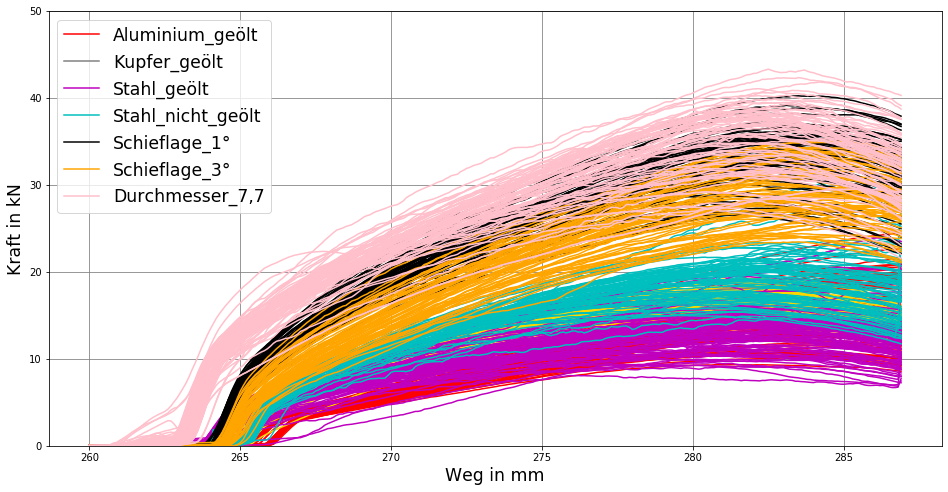

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.xlabel("Weg in mm", fontsize="xx-large")
plt.ylabel("Kraft in kN", fontsize="xx-large")
plt.ylim(0,50)

for i in range(0, Bereich_Aluminium_geölt+1):
    plt.plot(x_weg, y_kraft[i], "r")
plt.plot(x_weg, y_kraft[0], "r", label="Aluminium_geölt")    


for i in range(Bereich_Aluminium_geölt+1, Bereich_Kupfer_geölt+1):
    plt.plot(x_weg, y_kraft[i], "gold")
plt.plot(x_weg, y_kraft[Bereich_Aluminium_geölt+1], "grey", label="Kupfer_geölt")
  
    
for i in range(Bereich_Kupfer_geölt+1, Bereich_Stahl_geölt+1):
    plt.plot(x_weg, y_kraft[i], "m")
plt.plot(x_weg, y_kraft[Bereich_Kupfer_geölt+1], "m", label="Stahl_geölt")


for i in range(Bereich_Stahl_geölt+1, Bereich_Stahl_nicht_geölt+1):
    plt.plot(x_weg, y_kraft[i], "c")   
plt.plot(x_weg, y_kraft[Bereich_Stahl_geölt+1], "c", label="Stahl_nicht_geölt")    


for i in range(Bereich_Stahl_nicht_geölt+1, Bereich_Schieflage_1+1):
    plt.plot(x_weg, y_kraft[i], "k")   
plt.plot(x_weg, y_kraft[Bereich_Stahl_nicht_geölt+1], "k", label="Schieflage_1°")   


for i in range(Bereich_Schieflage_1+1, Bereich_Schieflage_3+1):
    plt.plot(x_weg, y_kraft[i], "orange")   
plt.plot(x_weg, y_kraft[Bereich_Schieflage_1+1], "orange", label="Schieflage_3°") 


for i in range(Bereich_Schieflage_3+1, Bereich_Durchmesser_77+1):
    plt.plot(x_weg, y_kraft[i], "pink")   
plt.plot(x_weg, y_kraft[Bereich_Schieflage_3+1], "pink", label="Durchmesser_7,7")   


plt.legend(loc='upper left', fontsize="xx-large")
plt.grid(color="grey", linestyle='-')
plt.show()


In [6]:
### X: Kraftverlaufsmatrix
X = y_kraft

### Y: label der Klassen
Y = df["Klassennummer"].values[:anzahl_zeile]

print(Y.shape)
print(X.shape)
print(X[1])
print(Y)

(551,)
(551, 270)
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.1095005
  0.1185993   0.1095005   0.1095005   0.1186553   0.1186553   0.1095
  0.1186553   0.1186553   0.1186553   0.1095      0.1186553   0.1186553
  0.1186553   0.1186553   0.1186553   0.1186553   0.1733366   0.40134221
  0.72968018  1.08535898  1.44116294  1.78781199  2.10699511  2.42617798
  2.69995999  2.92783999  3.1011641   3.21980691  3.29267406  3.33845091
  3.38397598  3.438658    3.49333906  3.56645608  3.6211369   3.69412899
  3.73965502  3.80349207  3.87648392  3.94032001  4.02234221  4.08630419
  4.16845083  

In [7]:
from keras.utils import to_categorical

Y = to_categorical(Y)

print(Y)

Using TensorFlow backend.


[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [18]:
from sklearn.model_selection import train_test_split

#random_state: wenn "None"-> zufällige Auswahl der Daten.
#              wenn eine Zahl(int)-> bestimmte Auswahl der Daten.
#shuffle: zuständig für Durchmischen der Reihenfolge der Daten(immer auf True setzen)

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=1, test_size=0.2, shuffle=True)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_test)

(440, 270)
(440, 7)
(111, 270)
(111, 7)
[[0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]


In [19]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout
from keras.callbacks import EarlyStopping

In [20]:
es = EarlyStopping(monitor="loss", patience=50, verbose=1)

def get_model():
            
    model = Sequential()
    
    model.add(Conv1D(16, kernel_size=8, activation="relu", input_shape=(spalten_ende - spalten_start, 1)))
    model.add(MaxPooling1D(3))
   
    model.add(Conv1D(16, kernel_size=8, activation="relu"))
    model.add(MaxPooling1D(3))
    
    model.add(Conv1D(16, kernel_size=8, activation="relu"))
    model.add(Dropout(0.25))

    model.add(Flatten())

    model.add(Dense(200, activation="relu"))
    model.add(Dense(100, activation="relu"))
    model.add(Dropout(0.33))
    model.add(Dense(7, activation="softmax"))
    
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

    return model

model = get_model()
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 263, 16)           144       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 87, 16)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 80, 16)            2064      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 26, 16)            0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 19, 16)            2064      
_________________________________________________________________
dropout_3 (Dropout)          (None, 19, 16)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 304)              

In [21]:
history = model.fit(x_train.reshape(-1, anzahl_spalte, 1), y_train, epochs=400, batch_size=1024, 
                    validation_split=0.2, callbacks=[es])

Train on 352 samples, validate on 88 samples
Epoch 1/400
352/352 [==============================] - 0s 901us/step - loss: 4.7901 - accuracy: 0.1534 - val_loss: 2.1521 - val_accuracy: 0.1250
Epoch 2/400
352/352 [==============================] - 0s 148us/step - loss: 2.8901 - accuracy: 0.1648 - val_loss: 2.0732 - val_accuracy: 0.1364
Epoch 3/400
352/352 [==============================] - 0s 178us/step - loss: 2.7984 - accuracy: 0.1250 - val_loss: 2.0590 - val_accuracy: 0.1364
Epoch 4/400
352/352 [==============================] - 0s 244us/step - loss: 2.3692 - accuracy: 0.1392 - val_loss: 1.9530 - val_accuracy: 0.1364
Epoch 5/400
352/352 [==============================] - 0s 146us/step - loss: 2.1388 - accuracy: 0.1364 - val_loss: 1.9147 - val_accuracy: 0.1364
Epoch 6/400
352/352 [==============================] - 0s 151us/step - loss: 1.9861 - accuracy: 0.1420 - val_loss: 1.9008 - val_accuracy: 0.1364
Epoch 7/400
352/352 [==============================] - 0s 167us/step - loss: 1.9196 -

Epoch 57/400
352/352 [==============================] - 0s 151us/step - loss: 1.0050 - accuracy: 0.6278 - val_loss: 0.9005 - val_accuracy: 0.7614
Epoch 58/400
352/352 [==============================] - 0s 137us/step - loss: 0.9648 - accuracy: 0.6250 - val_loss: 0.9110 - val_accuracy: 0.7273
Epoch 59/400
352/352 [==============================] - 0s 143us/step - loss: 1.0243 - accuracy: 0.6051 - val_loss: 0.8880 - val_accuracy: 0.7841
Epoch 60/400
352/352 [==============================] - 0s 140us/step - loss: 0.9559 - accuracy: 0.6591 - val_loss: 0.8562 - val_accuracy: 0.7045
Epoch 61/400
352/352 [==============================] - 0s 161us/step - loss: 0.9554 - accuracy: 0.5994 - val_loss: 0.8450 - val_accuracy: 0.7159
Epoch 62/400
352/352 [==============================] - 0s 169us/step - loss: 0.9756 - accuracy: 0.6278 - val_loss: 0.8417 - val_accuracy: 0.7614
Epoch 63/400
352/352 [==============================] - 0s 160us/step - loss: 0.9327 - accuracy: 0.6307 - val_loss: 0.8574 -

352/352 [==============================] - 0s 149us/step - loss: 0.6420 - accuracy: 0.7330 - val_loss: 0.5626 - val_accuracy: 0.7955
Epoch 114/400
352/352 [==============================] - 0s 173us/step - loss: 0.6565 - accuracy: 0.7472 - val_loss: 0.5197 - val_accuracy: 0.8523
Epoch 115/400
352/352 [==============================] - 0s 141us/step - loss: 0.5738 - accuracy: 0.7784 - val_loss: 0.5663 - val_accuracy: 0.8523
Epoch 116/400
352/352 [==============================] - 0s 146us/step - loss: 0.5849 - accuracy: 0.7784 - val_loss: 0.5239 - val_accuracy: 0.8750
Epoch 117/400
352/352 [==============================] - 0s 186us/step - loss: 0.5731 - accuracy: 0.7784 - val_loss: 0.5100 - val_accuracy: 0.9091
Epoch 118/400
352/352 [==============================] - 0s 174us/step - loss: 0.5626 - accuracy: 0.7784 - val_loss: 0.5190 - val_accuracy: 0.8864
Epoch 119/400
352/352 [==============================] - 0s 131us/step - loss: 0.5899 - accuracy: 0.7557 - val_loss: 0.4602 - val_ac

Epoch 169/400
352/352 [==============================] - 0s 150us/step - loss: 0.3113 - accuracy: 0.8920 - val_loss: 0.2979 - val_accuracy: 0.8864
Epoch 170/400
352/352 [==============================] - 0s 179us/step - loss: 0.3254 - accuracy: 0.8892 - val_loss: 0.2965 - val_accuracy: 0.9318
Epoch 171/400
352/352 [==============================] - 0s 212us/step - loss: 0.3575 - accuracy: 0.8608 - val_loss: 0.2859 - val_accuracy: 0.8977
Epoch 172/400
352/352 [==============================] - 0s 160us/step - loss: 0.3205 - accuracy: 0.8665 - val_loss: 0.2927 - val_accuracy: 0.9091
Epoch 173/400
352/352 [==============================] - 0s 127us/step - loss: 0.3127 - accuracy: 0.8778 - val_loss: 0.2796 - val_accuracy: 0.9318
Epoch 174/400
352/352 [==============================] - 0s 114us/step - loss: 0.3077 - accuracy: 0.8807 - val_loss: 0.2791 - val_accuracy: 0.9318
Epoch 175/400
352/352 [==============================] - 0s 181us/step - loss: 0.3215 - accuracy: 0.8580 - val_loss: 0

Epoch 225/400
352/352 [==============================] - 0s 179us/step - loss: 0.2881 - accuracy: 0.8778 - val_loss: 0.2832 - val_accuracy: 0.9091
Epoch 226/400
352/352 [==============================] - 0s 116us/step - loss: 0.2518 - accuracy: 0.9062 - val_loss: 0.2336 - val_accuracy: 0.9432
Epoch 227/400
352/352 [==============================] - 0s 110us/step - loss: 0.2291 - accuracy: 0.9034 - val_loss: 0.2510 - val_accuracy: 0.9432
Epoch 228/400
352/352 [==============================] - 0s 164us/step - loss: 0.2409 - accuracy: 0.8977 - val_loss: 0.2284 - val_accuracy: 0.9432
Epoch 229/400
352/352 [==============================] - 0s 178us/step - loss: 0.2223 - accuracy: 0.9062 - val_loss: 0.2414 - val_accuracy: 0.9205
Epoch 230/400
352/352 [==============================] - 0s 123us/step - loss: 0.2210 - accuracy: 0.9148 - val_loss: 0.2174 - val_accuracy: 0.9545
Epoch 231/400
352/352 [==============================] - 0s 193us/step - loss: 0.2186 - accuracy: 0.9176 - val_loss: 0

Epoch 281/400
352/352 [==============================] - 0s 201us/step - loss: 0.1976 - accuracy: 0.9318 - val_loss: 0.1755 - val_accuracy: 0.9432
Epoch 282/400
352/352 [==============================] - 0s 253us/step - loss: 0.1901 - accuracy: 0.9261 - val_loss: 0.2143 - val_accuracy: 0.9318
Epoch 283/400
352/352 [==============================] - 0s 200us/step - loss: 0.2085 - accuracy: 0.9261 - val_loss: 0.2082 - val_accuracy: 0.9545
Epoch 284/400
352/352 [==============================] - 0s 188us/step - loss: 0.1902 - accuracy: 0.9176 - val_loss: 0.2201 - val_accuracy: 0.9432
Epoch 285/400
352/352 [==============================] - 0s 210us/step - loss: 0.1736 - accuracy: 0.9205 - val_loss: 0.2047 - val_accuracy: 0.9545
Epoch 286/400
352/352 [==============================] - 0s 240us/step - loss: 0.2055 - accuracy: 0.9176 - val_loss: 0.1850 - val_accuracy: 0.9659
Epoch 287/400
352/352 [==============================] - 0s 225us/step - loss: 0.1786 - accuracy: 0.9460 - val_loss: 0

Epoch 337/400
352/352 [==============================] - 0s 155us/step - loss: 0.1418 - accuracy: 0.9460 - val_loss: 0.1385 - val_accuracy: 0.9659
Epoch 338/400
352/352 [==============================] - 0s 234us/step - loss: 0.1559 - accuracy: 0.9403 - val_loss: 0.1366 - val_accuracy: 0.9659
Epoch 339/400
352/352 [==============================] - 0s 243us/step - loss: 0.1791 - accuracy: 0.9347 - val_loss: 0.1377 - val_accuracy: 0.9659
Epoch 340/400
352/352 [==============================] - 0s 267us/step - loss: 0.1601 - accuracy: 0.9460 - val_loss: 0.1285 - val_accuracy: 0.9659
Epoch 341/400
352/352 [==============================] - 0s 225us/step - loss: 0.1502 - accuracy: 0.9375 - val_loss: 0.1257 - val_accuracy: 0.9659
Epoch 342/400
352/352 [==============================] - 0s 201us/step - loss: 0.1419 - accuracy: 0.9403 - val_loss: 0.1279 - val_accuracy: 0.9659
Epoch 343/400
352/352 [==============================] - 0s 111us/step - loss: 0.1280 - accuracy: 0.9574 - val_loss: 0

Epoch 393/400
352/352 [==============================] - 0s 249us/step - loss: 0.1561 - accuracy: 0.9489 - val_loss: 0.1155 - val_accuracy: 0.9773
Epoch 394/400
352/352 [==============================] - 0s 211us/step - loss: 0.1299 - accuracy: 0.9489 - val_loss: 0.1229 - val_accuracy: 0.9773
Epoch 395/400
352/352 [==============================] - 0s 188us/step - loss: 0.1150 - accuracy: 0.9545 - val_loss: 0.1151 - val_accuracy: 0.9773
Epoch 396/400
352/352 [==============================] - 0s 122us/step - loss: 0.1149 - accuracy: 0.9545 - val_loss: 0.1121 - val_accuracy: 0.9773
Epoch 397/400
352/352 [==============================] - 0s 233us/step - loss: 0.1115 - accuracy: 0.9545 - val_loss: 0.1091 - val_accuracy: 0.9773
Epoch 398/400
352/352 [==============================] - 0s 209us/step - loss: 0.1200 - accuracy: 0.9602 - val_loss: 0.1130 - val_accuracy: 0.9773
Epoch 399/400
352/352 [==============================] - 0s 175us/step - loss: 0.1327 - accuracy: 0.9545 - val_loss: 0

In [22]:
print(model.evaluate(x_test.reshape(-1, anzahl_spalte, 1), y_test))

111/111 [==============================] - 0s 152us/step
[0.07141613611229905, 0.9729729890823364]


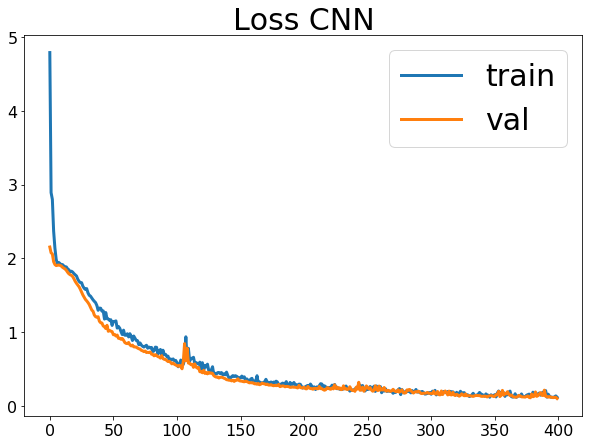

In [27]:
plt.figure(figsize=(10,7))
plt.title('Loss CNN', fontsize=30)
plt.plot(history.history['loss'], label='train', linewidth=3)
plt.plot(history.history['val_loss'], label='val', linewidth=3)
plt.legend(loc='upper right', fontsize=30)
plt.tick_params(axis="x", labelsize=16)
plt.tick_params(axis="y", labelsize=16)
plt.show()

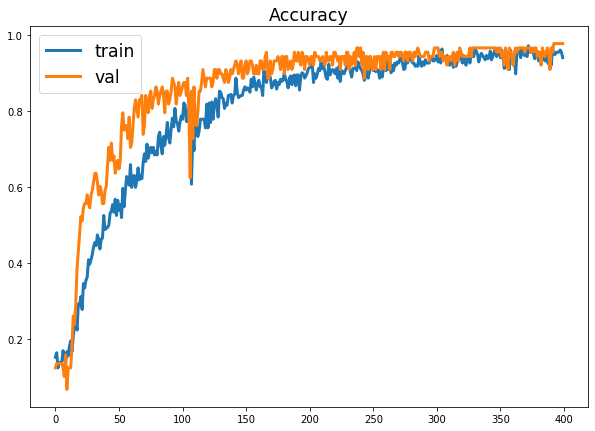

In [24]:
plt.figure(figsize=(10, 7))
plt.title('Accuracy', fontsize="xx-large")
plt.plot(history.history['accuracy'], label='train', linewidth=3)
plt.plot(history.history['val_accuracy'], label='val', linewidth=3)
plt.legend(loc='upper left', fontsize="xx-large")
plt.show()

In [25]:
from pandas_ml import ConfusionMatrix

pred_classes = model.predict_classes(x_test.reshape(-1, anzahl_spalte, 1))
print(pred_classes)

y_converted = np.argmax(y_test, axis=1)
print(y_converted)

ConfusionMatrix(y_converted, pred_classes)

[1 3 0 5 1 2 3 3 3 4 5 6 2 6 2 3 5 6 0 0 0 4 5 6 4 6 4 1 6 0 1 4 2 4 6 5 1
 1 5 0 4 5 1 2 0 2 1 2 4 0 2 6 6 0 4 5 2 4 5 2 5 5 0 0 4 0 2 5 2 2 2 2 5 6
 4 2 6 2 6 0 0 6 1 0 4 4 4 3 0 2 6 3 3 2 0 6 5 1 6 0 5 4 0 5 6 5 4 0 2 1 2]
[1 3 0 5 1 2 3 3 3 4 5 6 2 6 2 3 5 6 0 0 0 4 5 6 4 6 4 1 6 0 1 4 2 4 6 5 1
 1 5 0 4 5 1 2 0 2 1 2 4 0 2 6 6 0 5 5 2 4 5 2 5 5 0 3 4 0 2 5 2 2 2 2 5 6
 4 2 6 2 6 0 0 6 1 0 5 4 4 3 0 2 6 3 3 2 0 6 5 1 6 0 5 4 0 5 6 5 4 0 2 1 2]


Predicted   0   1   2  3   4   5   6  __all__
Actual                                       
0          19   0   0  0   0   0   0       19
1           0  11   0  0   0   0   0       11
2           0   0  21  0   0   0   0       21
3           1   0   0  8   0   0   0        9
4           0   0   0  0  15   0   0       15
5           0   0   0  0   2  17   0       19
6           0   0   0  0   0   0  17       17
__all__    20  11  21  8  17  17  17      111

In [26]:
from sklearn.metrics import classification_report

report = classification_report(y_converted, pred_classes)
print(report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        21
           3       1.00      0.89      0.94         9
           4       0.88      1.00      0.94        15
           5       1.00      0.89      0.94        19
           6       1.00      1.00      1.00        17

    accuracy                           0.97       111
   macro avg       0.98      0.97      0.97       111
weighted avg       0.98      0.97      0.97       111



In [17]:
from sklearn.metrics import f1_score

test_acc = []
micro_f1 = []
macro_f1 = []
weighted_f1 = []

for i in range(0, 20):

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=None, test_size=0.2, shuffle=True)

    model_final = Sequential()

    model_final.add(Conv1D(16, 8, activation='relu', input_shape=(anzahl_spalte, 1)))
    model_final.add(MaxPooling1D(3))

    model_final.add(Conv1D(16, 8, activation='relu'))
    model_final.add(MaxPooling1D(3))
    
    model_final.add(Conv1D(16, 8, activation='relu'))
    model_final.add(Dropout(0.25))
    
    model_final.add(Flatten())
    
    model_final.add(Dense(200, activation='relu'))
    model_final.add(Dense(100, activation='relu'))
    model_final.add(Dropout(0.33))
    model_final.add(Dense(7, activation='softmax'))

    model_final.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

    es = EarlyStopping(monitor="loss", patience=50, verbose=1)   

    print([i],"ter Druchlauf")
    history = model_final.fit(X_train.reshape(-1, anzahl_spalte, 1), Y_train, epochs=400, batch_size=1024, 
                           validation_split=0.2, callbacks=[es])
    
    
    test_acc.append(model_final.evaluate(X_test.reshape(-1, anzahl_spalte, 1), Y_test))
    
    Pred_Classes = model_final.predict_classes(X_test.reshape(-1, anzahl_spalte, 1))
    Y_converted = np.argmax(Y_test, axis=1)
    micro_f1.append(f1_score(Y_converted, Pred_Classes, average='micro'))
    macro_f1.append(f1_score(Y_converted, Pred_Classes, average='macro'))
    weighted_f1.append(f1_score(Y_converted, Pred_Classes, average='weighted'))
    
    print(model_final.evaluate(X_test.reshape(-1, anzahl_spalte, 1), Y_test))
    model_final.reset_states()
    print("------------------------------------------------------------------------------------------------------------------------")

[0] ter Druchlauf
Train on 352 samples, validate on 88 samples
Epoch 1/400
352/352 [==============================] - 0s 895us/step - loss: 5.8518 - accuracy: 0.1364 - val_loss: 2.2549 - val_accuracy: 0.1250
Epoch 2/400
352/352 [==============================] - 0s 138us/step - loss: 3.8159 - accuracy: 0.1449 - val_loss: 2.3534 - val_accuracy: 0.1250
Epoch 3/400
352/352 [==============================] - 0s 174us/step - loss: 3.3323 - accuracy: 0.1648 - val_loss: 2.2182 - val_accuracy: 0.1705
Epoch 4/400
352/352 [==============================] - 0s 161us/step - loss: 2.9783 - accuracy: 0.1165 - val_loss: 2.0571 - val_accuracy: 0.1364
Epoch 5/400
352/352 [==============================] - 0s 217us/step - loss: 2.3855 - accuracy: 0.1818 - val_loss: 1.9366 - val_accuracy: 0.1477
Epoch 6/400
352/352 [==============================] - 0s 206us/step - loss: 2.2566 - accuracy: 0.1676 - val_loss: 1.8973 - val_accuracy: 0.1364
Epoch 7/400
352/352 [==============================] - 0s 188us/ste

Epoch 57/400
352/352 [==============================] - 0s 178us/step - loss: 1.3762 - accuracy: 0.4943 - val_loss: 1.2367 - val_accuracy: 0.7614
Epoch 58/400
352/352 [==============================] - 0s 196us/step - loss: 1.3313 - accuracy: 0.5256 - val_loss: 1.2431 - val_accuracy: 0.6477
Epoch 59/400
352/352 [==============================] - 0s 240us/step - loss: 1.3473 - accuracy: 0.5000 - val_loss: 1.2087 - val_accuracy: 0.6591
Epoch 60/400
352/352 [==============================] - 0s 240us/step - loss: 1.3308 - accuracy: 0.4801 - val_loss: 1.1393 - val_accuracy: 0.7386
Epoch 61/400
352/352 [==============================] - 0s 222us/step - loss: 1.3075 - accuracy: 0.4886 - val_loss: 1.1012 - val_accuracy: 0.7614
Epoch 62/400
352/352 [==============================] - 0s 172us/step - loss: 1.2580 - accuracy: 0.5312 - val_loss: 1.1034 - val_accuracy: 0.7386
Epoch 63/400
352/352 [==============================] - 0s 174us/step - loss: 1.2570 - accuracy: 0.5341 - val_loss: 1.0744 -

352/352 [==============================] - 0s 133us/step - loss: 0.5324 - accuracy: 0.7955 - val_loss: 0.3999 - val_accuracy: 0.8068
Epoch 114/400
352/352 [==============================] - 0s 121us/step - loss: 0.5100 - accuracy: 0.7699 - val_loss: 0.3952 - val_accuracy: 0.7955
Epoch 115/400
352/352 [==============================] - 0s 133us/step - loss: 0.4951 - accuracy: 0.8040 - val_loss: 0.3878 - val_accuracy: 0.8295
Epoch 116/400
352/352 [==============================] - 0s 137us/step - loss: 0.4661 - accuracy: 0.8040 - val_loss: 0.3955 - val_accuracy: 0.8523
Epoch 117/400
352/352 [==============================] - 0s 133us/step - loss: 0.5517 - accuracy: 0.7841 - val_loss: 0.3801 - val_accuracy: 0.8182
Epoch 118/400
352/352 [==============================] - 0s 107us/step - loss: 0.5070 - accuracy: 0.7756 - val_loss: 0.3798 - val_accuracy: 0.8182
Epoch 119/400
352/352 [==============================] - 0s 89us/step - loss: 0.4771 - accuracy: 0.7926 - val_loss: 0.3710 - val_acc

Epoch 169/400
352/352 [==============================] - 0s 183us/step - loss: 0.3287 - accuracy: 0.8693 - val_loss: 0.2816 - val_accuracy: 0.9205
Epoch 170/400
352/352 [==============================] - 0s 153us/step - loss: 0.2618 - accuracy: 0.9148 - val_loss: 0.3421 - val_accuracy: 0.8523
Epoch 171/400
352/352 [==============================] - 0s 181us/step - loss: 0.3464 - accuracy: 0.8693 - val_loss: 0.3030 - val_accuracy: 0.8636
Epoch 172/400
352/352 [==============================] - 0s 194us/step - loss: 0.3564 - accuracy: 0.8807 - val_loss: 0.3202 - val_accuracy: 0.8182
Epoch 173/400
352/352 [==============================] - 0s 288us/step - loss: 0.3367 - accuracy: 0.8494 - val_loss: 0.3238 - val_accuracy: 0.8750
Epoch 174/400
352/352 [==============================] - 0s 263us/step - loss: 0.3440 - accuracy: 0.8551 - val_loss: 0.3017 - val_accuracy: 0.8864
Epoch 175/400
352/352 [==============================] - 0s 239us/step - loss: 0.3201 - accuracy: 0.8608 - val_loss: 0

Epoch 225/400
352/352 [==============================] - 0s 219us/step - loss: 0.2578 - accuracy: 0.8920 - val_loss: 0.3035 - val_accuracy: 0.8750
Epoch 226/400
352/352 [==============================] - 0s 150us/step - loss: 0.2624 - accuracy: 0.8920 - val_loss: 0.2478 - val_accuracy: 0.9091
Epoch 227/400
352/352 [==============================] - 0s 183us/step - loss: 0.2142 - accuracy: 0.9062 - val_loss: 0.2598 - val_accuracy: 0.8977
Epoch 228/400
352/352 [==============================] - 0s 147us/step - loss: 0.2905 - accuracy: 0.8920 - val_loss: 0.2466 - val_accuracy: 0.9318
Epoch 229/400
352/352 [==============================] - 0s 184us/step - loss: 0.2258 - accuracy: 0.9062 - val_loss: 0.2959 - val_accuracy: 0.8636
Epoch 230/400
352/352 [==============================] - 0s 147us/step - loss: 0.2785 - accuracy: 0.8778 - val_loss: 0.2613 - val_accuracy: 0.9091
Epoch 231/400
352/352 [==============================] - 0s 164us/step - loss: 0.2949 - accuracy: 0.8636 - val_loss: 0

Epoch 281/400
352/352 [==============================] - 0s 102us/step - loss: 0.2593 - accuracy: 0.8807 - val_loss: 0.2461 - val_accuracy: 0.9318
Epoch 282/400
352/352 [==============================] - 0s 178us/step - loss: 0.2239 - accuracy: 0.9062 - val_loss: 0.2102 - val_accuracy: 0.9205
Epoch 283/400
352/352 [==============================] - 0s 133us/step - loss: 0.2021 - accuracy: 0.9148 - val_loss: 0.2201 - val_accuracy: 0.9205
Epoch 284/400
352/352 [==============================] - 0s 133us/step - loss: 0.2515 - accuracy: 0.8892 - val_loss: 0.2230 - val_accuracy: 0.9545
Epoch 285/400
352/352 [==============================] - 0s 133us/step - loss: 0.2254 - accuracy: 0.9205 - val_loss: 0.2697 - val_accuracy: 0.9318
Epoch 286/400
352/352 [==============================] - 0s 133us/step - loss: 0.2296 - accuracy: 0.9091 - val_loss: 0.2310 - val_accuracy: 0.9432
Epoch 287/400
352/352 [==============================] - 0s 133us/step - loss: 0.2010 - accuracy: 0.9119 - val_loss: 0

Epoch 337/400
352/352 [==============================] - 0s 133us/step - loss: 0.1794 - accuracy: 0.9290 - val_loss: 0.1700 - val_accuracy: 0.9205
Epoch 338/400
352/352 [==============================] - 0s 133us/step - loss: 0.1688 - accuracy: 0.9318 - val_loss: 0.2176 - val_accuracy: 0.9432
Epoch 339/400
352/352 [==============================] - 0s 133us/step - loss: 0.1844 - accuracy: 0.9176 - val_loss: 0.1770 - val_accuracy: 0.9205
Epoch 340/400
352/352 [==============================] - 0s 133us/step - loss: 0.1590 - accuracy: 0.9347 - val_loss: 0.1822 - val_accuracy: 0.9545
Epoch 341/400
352/352 [==============================] - 0s 159us/step - loss: 0.1643 - accuracy: 0.9347 - val_loss: 0.2445 - val_accuracy: 0.9205
Epoch 342/400
352/352 [==============================] - 0s 136us/step - loss: 0.1940 - accuracy: 0.9233 - val_loss: 0.1941 - val_accuracy: 0.9205
Epoch 343/400
352/352 [==============================] - 0s 136us/step - loss: 0.1726 - accuracy: 0.9233 - val_loss: 0

Epoch 393/400
352/352 [==============================] - 0s 170us/step - loss: 0.1307 - accuracy: 0.9517 - val_loss: 0.1628 - val_accuracy: 0.9545
Epoch 394/400
352/352 [==============================] - 0s 159us/step - loss: 0.1044 - accuracy: 0.9659 - val_loss: 0.1685 - val_accuracy: 0.9545
Epoch 395/400
352/352 [==============================] - 0s 148us/step - loss: 0.1074 - accuracy: 0.9517 - val_loss: 0.1814 - val_accuracy: 0.9545
Epoch 396/400
352/352 [==============================] - 0s 234us/step - loss: 0.1144 - accuracy: 0.9659 - val_loss: 0.1630 - val_accuracy: 0.9545
Epoch 397/400
352/352 [==============================] - 0s 172us/step - loss: 0.1023 - accuracy: 0.9631 - val_loss: 0.1653 - val_accuracy: 0.9545
Epoch 398/400
352/352 [==============================] - 0s 143us/step - loss: 0.1139 - accuracy: 0.9602 - val_loss: 0.1901 - val_accuracy: 0.9545
Epoch 399/400
352/352 [==============================] - 0s 153us/step - loss: 0.1200 - accuracy: 0.9460 - val_loss: 0

Epoch 47/400
352/352 [==============================] - 0s 169us/step - loss: 1.3380 - accuracy: 0.4915 - val_loss: 1.1453 - val_accuracy: 0.5682
Epoch 48/400
352/352 [==============================] - 0s 140us/step - loss: 1.2584 - accuracy: 0.5455 - val_loss: 1.1079 - val_accuracy: 0.6364
Epoch 49/400
352/352 [==============================] - 0s 119us/step - loss: 1.2020 - accuracy: 0.5540 - val_loss: 1.0680 - val_accuracy: 0.6023
Epoch 50/400
352/352 [==============================] - 0s 127us/step - loss: 1.1555 - accuracy: 0.5795 - val_loss: 1.0408 - val_accuracy: 0.6477
Epoch 51/400
352/352 [==============================] - 0s 180us/step - loss: 1.1144 - accuracy: 0.5909 - val_loss: 0.9997 - val_accuracy: 0.6250
Epoch 52/400
352/352 [==============================] - 0s 110us/step - loss: 1.1546 - accuracy: 0.5795 - val_loss: 0.9659 - val_accuracy: 0.5909
Epoch 53/400
352/352 [==============================] - 0s 236us/step - loss: 1.0786 - accuracy: 0.5710 - val_loss: 0.9503 -

352/352 [==============================] - 0s 170us/step - loss: 0.5120 - accuracy: 0.7841 - val_loss: 0.4849 - val_accuracy: 0.8182
Epoch 104/400
352/352 [==============================] - 0s 157us/step - loss: 0.4246 - accuracy: 0.8438 - val_loss: 0.4839 - val_accuracy: 0.8409
Epoch 105/400
352/352 [==============================] - 0s 156us/step - loss: 0.4906 - accuracy: 0.8182 - val_loss: 0.4789 - val_accuracy: 0.8409
Epoch 106/400
352/352 [==============================] - 0s 116us/step - loss: 0.4749 - accuracy: 0.8210 - val_loss: 0.4529 - val_accuracy: 0.8409
Epoch 107/400
352/352 [==============================] - 0s 182us/step - loss: 0.4476 - accuracy: 0.8068 - val_loss: 0.4638 - val_accuracy: 0.8409
Epoch 108/400
352/352 [==============================] - 0s 162us/step - loss: 0.5063 - accuracy: 0.7898 - val_loss: 0.4327 - val_accuracy: 0.8636
Epoch 109/400
352/352 [==============================] - 0s 172us/step - loss: 0.4469 - accuracy: 0.8153 - val_loss: 0.4434 - val_ac

Epoch 159/400
352/352 [==============================] - 0s 163us/step - loss: 0.8647 - accuracy: 0.6562 - val_loss: 0.9249 - val_accuracy: 0.5795
Epoch 160/400
352/352 [==============================] - 0s 154us/step - loss: 0.7340 - accuracy: 0.6818 - val_loss: 0.7249 - val_accuracy: 0.6705
Epoch 161/400
352/352 [==============================] - 0s 193us/step - loss: 0.7320 - accuracy: 0.6989 - val_loss: 0.8710 - val_accuracy: 0.7045
Epoch 162/400
352/352 [==============================] - 0s 276us/step - loss: 0.9510 - accuracy: 0.6790 - val_loss: 0.4717 - val_accuracy: 0.8068
Epoch 163/400
352/352 [==============================] - 0s 250us/step - loss: 0.5488 - accuracy: 0.7699 - val_loss: 0.6038 - val_accuracy: 0.7159
Epoch 164/400
352/352 [==============================] - 0s 198us/step - loss: 0.6643 - accuracy: 0.7244 - val_loss: 0.6851 - val_accuracy: 0.6591
Epoch 165/400
352/352 [==============================] - 0s 271us/step - loss: 0.7305 - accuracy: 0.7131 - val_loss: 0

Epoch 9/400
352/352 [==============================] - 0s 189us/step - loss: 1.8703 - accuracy: 0.1705 - val_loss: 1.8205 - val_accuracy: 0.2727
Epoch 10/400
352/352 [==============================] - 0s 124us/step - loss: 1.8459 - accuracy: 0.1591 - val_loss: 1.8121 - val_accuracy: 0.2500
Epoch 11/400
352/352 [==============================] - 0s 172us/step - loss: 1.8469 - accuracy: 0.1676 - val_loss: 1.8030 - val_accuracy: 0.1591
Epoch 12/400
352/352 [==============================] - 0s 124us/step - loss: 1.8189 - accuracy: 0.1989 - val_loss: 1.7760 - val_accuracy: 0.2614
Epoch 13/400
352/352 [==============================] - 0s 176us/step - loss: 1.7971 - accuracy: 0.1932 - val_loss: 1.7436 - val_accuracy: 0.2727
Epoch 14/400
352/352 [==============================] - 0s 130us/step - loss: 1.7983 - accuracy: 0.1989 - val_loss: 1.7189 - val_accuracy: 0.2727
Epoch 15/400
352/352 [==============================] - 0s 156us/step - loss: 1.7832 - accuracy: 0.2045 - val_loss: 1.6998 - 

Epoch 66/400
352/352 [==============================] - 0s 167us/step - loss: 0.7149 - accuracy: 0.7500 - val_loss: 0.5916 - val_accuracy: 0.7841
Epoch 67/400
352/352 [==============================] - 0s 135us/step - loss: 0.7878 - accuracy: 0.7102 - val_loss: 0.6087 - val_accuracy: 0.7614
Epoch 68/400
352/352 [==============================] - 0s 122us/step - loss: 0.7419 - accuracy: 0.7273 - val_loss: 0.5696 - val_accuracy: 0.7614
Epoch 69/400
352/352 [==============================] - 0s 135us/step - loss: 0.6974 - accuracy: 0.7841 - val_loss: 0.5765 - val_accuracy: 0.7614
Epoch 70/400
352/352 [==============================] - 0s 128us/step - loss: 0.7173 - accuracy: 0.7528 - val_loss: 0.5472 - val_accuracy: 0.7614
Epoch 71/400
352/352 [==============================] - 0s 154us/step - loss: 0.6817 - accuracy: 0.7330 - val_loss: 0.5370 - val_accuracy: 0.7727
Epoch 72/400
352/352 [==============================] - 0s 181us/step - loss: 0.6836 - accuracy: 0.7330 - val_loss: 0.5545 -

Epoch 122/400
352/352 [==============================] - 0s 187us/step - loss: 0.4025 - accuracy: 0.8494 - val_loss: 0.3509 - val_accuracy: 0.8864
Epoch 123/400
352/352 [==============================] - 0s 124us/step - loss: 0.4109 - accuracy: 0.8267 - val_loss: 0.3461 - val_accuracy: 0.8864
Epoch 124/400
352/352 [==============================] - 0s 129us/step - loss: 0.3901 - accuracy: 0.8409 - val_loss: 0.3569 - val_accuracy: 0.8523
Epoch 125/400
352/352 [==============================] - 0s 101us/step - loss: 0.4260 - accuracy: 0.8239 - val_loss: 0.3432 - val_accuracy: 0.8636
Epoch 126/400
352/352 [==============================] - 0s 194us/step - loss: 0.4112 - accuracy: 0.8352 - val_loss: 0.3436 - val_accuracy: 0.8864
Epoch 127/400
352/352 [==============================] - 0s 156us/step - loss: 0.4171 - accuracy: 0.8267 - val_loss: 0.3488 - val_accuracy: 0.8636
Epoch 128/400
352/352 [==============================] - 0s 146us/step - loss: 0.3611 - accuracy: 0.8409 - val_loss: 0

Epoch 178/400
352/352 [==============================] - 0s 223us/step - loss: 0.2744 - accuracy: 0.8835 - val_loss: 0.2358 - val_accuracy: 0.9318
Epoch 179/400
352/352 [==============================] - 0s 253us/step - loss: 0.2283 - accuracy: 0.9062 - val_loss: 0.2721 - val_accuracy: 0.8977
Epoch 180/400
352/352 [==============================] - 0s 233us/step - loss: 0.3245 - accuracy: 0.8750 - val_loss: 0.2462 - val_accuracy: 0.8864
Epoch 181/400
352/352 [==============================] - 0s 283us/step - loss: 0.2583 - accuracy: 0.9062 - val_loss: 0.2684 - val_accuracy: 0.8864
Epoch 182/400
352/352 [==============================] - 0s 232us/step - loss: 0.2906 - accuracy: 0.8750 - val_loss: 0.2371 - val_accuracy: 0.9091
Epoch 183/400
352/352 [==============================] - 0s 180us/step - loss: 0.2652 - accuracy: 0.8892 - val_loss: 0.2863 - val_accuracy: 0.8977
Epoch 184/400
352/352 [==============================] - 0s 175us/step - loss: 0.2825 - accuracy: 0.8750 - val_loss: 0

Epoch 234/400
352/352 [==============================] - 0s 259us/step - loss: 0.2719 - accuracy: 0.8949 - val_loss: 0.2249 - val_accuracy: 0.8977
Epoch 235/400
352/352 [==============================] - 0s 218us/step - loss: 0.2506 - accuracy: 0.8977 - val_loss: 0.2426 - val_accuracy: 0.9205
Epoch 236/400
352/352 [==============================] - 0s 235us/step - loss: 0.2688 - accuracy: 0.8778 - val_loss: 0.2620 - val_accuracy: 0.9318
Epoch 237/400
352/352 [==============================] - 0s 185us/step - loss: 0.2736 - accuracy: 0.8892 - val_loss: 0.2628 - val_accuracy: 0.9205
Epoch 238/400
352/352 [==============================] - 0s 156us/step - loss: 0.2487 - accuracy: 0.9034 - val_loss: 0.2561 - val_accuracy: 0.8864
Epoch 239/400
352/352 [==============================] - 0s 117us/step - loss: 0.2620 - accuracy: 0.8864 - val_loss: 0.2425 - val_accuracy: 0.9091
Epoch 240/400
352/352 [==============================] - 0s 162us/step - loss: 0.2666 - accuracy: 0.8920 - val_loss: 0

Epoch 290/400
352/352 [==============================] - 0s 139us/step - loss: 0.1603 - accuracy: 0.9432 - val_loss: 0.1370 - val_accuracy: 0.9432
Epoch 291/400
352/352 [==============================] - 0s 146us/step - loss: 0.1172 - accuracy: 0.9602 - val_loss: 0.1281 - val_accuracy: 0.9432
Epoch 292/400
352/352 [==============================] - 0s 158us/step - loss: 0.1559 - accuracy: 0.9318 - val_loss: 0.1276 - val_accuracy: 0.9432
Epoch 293/400
352/352 [==============================] - 0s 147us/step - loss: 0.1495 - accuracy: 0.9347 - val_loss: 0.1243 - val_accuracy: 0.9432
Epoch 294/400
352/352 [==============================] - 0s 145us/step - loss: 0.1586 - accuracy: 0.9290 - val_loss: 0.1283 - val_accuracy: 0.9318
Epoch 295/400
352/352 [==============================] - 0s 173us/step - loss: 0.1365 - accuracy: 0.9489 - val_loss: 0.1393 - val_accuracy: 0.9318
Epoch 296/400
352/352 [==============================] - 0s 126us/step - loss: 0.1565 - accuracy: 0.9347 - val_loss: 0

Epoch 346/400
352/352 [==============================] - 0s 184us/step - loss: 0.1128 - accuracy: 0.9460 - val_loss: 0.1075 - val_accuracy: 0.9432
Epoch 347/400
352/352 [==============================] - 0s 149us/step - loss: 0.1058 - accuracy: 0.9574 - val_loss: 0.1045 - val_accuracy: 0.9432
Epoch 348/400
352/352 [==============================] - 0s 138us/step - loss: 0.0885 - accuracy: 0.9716 - val_loss: 0.1066 - val_accuracy: 0.9432
Epoch 349/400
352/352 [==============================] - 0s 155us/step - loss: 0.0926 - accuracy: 0.9659 - val_loss: 0.1101 - val_accuracy: 0.9432
Epoch 350/400
352/352 [==============================] - 0s 149us/step - loss: 0.1079 - accuracy: 0.9545 - val_loss: 0.1052 - val_accuracy: 0.9432
Epoch 351/400
352/352 [==============================] - 0s 165us/step - loss: 0.1275 - accuracy: 0.9432 - val_loss: 0.1057 - val_accuracy: 0.9545
Epoch 352/400
352/352 [==============================] - 0s 184us/step - loss: 0.0824 - accuracy: 0.9773 - val_loss: 0

[0.08155114814504846, 0.9819819927215576]
------------------------------------------------------------------------------------------------------------------------
[3] ter Druchlauf
Train on 352 samples, validate on 88 samples
Epoch 1/400
352/352 [==============================] - 0s 782us/step - loss: 2.5707 - accuracy: 0.1335 - val_loss: 2.0060 - val_accuracy: 0.0795
Epoch 2/400
352/352 [==============================] - 0s 136us/step - loss: 2.2150 - accuracy: 0.1619 - val_loss: 2.0059 - val_accuracy: 0.0795
Epoch 3/400
352/352 [==============================] - 0s 115us/step - loss: 2.1126 - accuracy: 0.1278 - val_loss: 1.9832 - val_accuracy: 0.0795
Epoch 4/400
352/352 [==============================] - 0s 153us/step - loss: 2.0262 - accuracy: 0.1136 - val_loss: 1.9611 - val_accuracy: 0.0795
Epoch 5/400
352/352 [==============================] - 0s 152us/step - loss: 1.9554 - accuracy: 0.1733 - val_loss: 1.9568 - val_accuracy: 0.0795
Epoch 6/400
352/352 [============================

Epoch 56/400
352/352 [==============================] - 0s 142us/step - loss: 1.0862 - accuracy: 0.5739 - val_loss: 0.9207 - val_accuracy: 0.6705
Epoch 57/400
352/352 [==============================] - 0s 125us/step - loss: 1.0273 - accuracy: 0.5653 - val_loss: 0.8966 - val_accuracy: 0.7159
Epoch 58/400
352/352 [==============================] - 0s 165us/step - loss: 1.0291 - accuracy: 0.5966 - val_loss: 0.8854 - val_accuracy: 0.7841
Epoch 59/400
352/352 [==============================] - 0s 246us/step - loss: 1.0024 - accuracy: 0.5881 - val_loss: 0.8455 - val_accuracy: 0.7841
Epoch 60/400
352/352 [==============================] - 0s 137us/step - loss: 1.0163 - accuracy: 0.6222 - val_loss: 0.7813 - val_accuracy: 0.7955
Epoch 61/400
352/352 [==============================] - 0s 123us/step - loss: 0.9889 - accuracy: 0.6250 - val_loss: 0.7660 - val_accuracy: 0.8182
Epoch 62/400
352/352 [==============================] - 0s 133us/step - loss: 0.9677 - accuracy: 0.6335 - val_loss: 0.7860 -

352/352 [==============================] - 0s 216us/step - loss: 0.3911 - accuracy: 0.8693 - val_loss: 0.2874 - val_accuracy: 0.8864
Epoch 113/400
352/352 [==============================] - 0s 203us/step - loss: 0.3911 - accuracy: 0.8438 - val_loss: 0.2928 - val_accuracy: 0.8750
Epoch 114/400
352/352 [==============================] - 0s 161us/step - loss: 0.4077 - accuracy: 0.8295 - val_loss: 0.3289 - val_accuracy: 0.8864
Epoch 115/400
352/352 [==============================] - 0s 154us/step - loss: 0.3467 - accuracy: 0.8608 - val_loss: 0.3231 - val_accuracy: 0.8864
Epoch 116/400
352/352 [==============================] - 0s 165us/step - loss: 0.4333 - accuracy: 0.8153 - val_loss: 0.2912 - val_accuracy: 0.8750
Epoch 117/400
352/352 [==============================] - 0s 225us/step - loss: 0.3849 - accuracy: 0.8352 - val_loss: 0.2961 - val_accuracy: 0.8864
Epoch 118/400
352/352 [==============================] - 0s 136us/step - loss: 0.3465 - accuracy: 0.8722 - val_loss: 0.2818 - val_ac

Epoch 168/400
352/352 [==============================] - 0s 187us/step - loss: 0.2249 - accuracy: 0.9261 - val_loss: 0.2102 - val_accuracy: 0.9318
Epoch 169/400
352/352 [==============================] - 0s 192us/step - loss: 0.2290 - accuracy: 0.9091 - val_loss: 0.2041 - val_accuracy: 0.9318
Epoch 170/400
352/352 [==============================] - 0s 166us/step - loss: 0.2539 - accuracy: 0.8920 - val_loss: 0.2020 - val_accuracy: 0.9205
Epoch 171/400
352/352 [==============================] - 0s 170us/step - loss: 0.2347 - accuracy: 0.8977 - val_loss: 0.1977 - val_accuracy: 0.9318
Epoch 172/400
352/352 [==============================] - 0s 148us/step - loss: 0.2142 - accuracy: 0.9148 - val_loss: 0.1998 - val_accuracy: 0.9318
Epoch 173/400
352/352 [==============================] - 0s 193us/step - loss: 0.2336 - accuracy: 0.9091 - val_loss: 0.2143 - val_accuracy: 0.9318
Epoch 174/400
352/352 [==============================] - 0s 137us/step - loss: 0.2084 - accuracy: 0.9375 - val_loss: 0

Epoch 224/400
352/352 [==============================] - 0s 155us/step - loss: 0.1744 - accuracy: 0.9403 - val_loss: 0.1797 - val_accuracy: 0.9432
Epoch 225/400
352/352 [==============================] - 0s 210us/step - loss: 0.1625 - accuracy: 0.9347 - val_loss: 0.1902 - val_accuracy: 0.9318
Epoch 226/400
352/352 [==============================] - 0s 119us/step - loss: 0.1718 - accuracy: 0.9205 - val_loss: 0.1674 - val_accuracy: 0.9318
Epoch 227/400
352/352 [==============================] - 0s 153us/step - loss: 0.1664 - accuracy: 0.9261 - val_loss: 0.1691 - val_accuracy: 0.9318
Epoch 228/400
352/352 [==============================] - 0s 140us/step - loss: 0.1408 - accuracy: 0.9432 - val_loss: 0.1909 - val_accuracy: 0.9432
Epoch 229/400
352/352 [==============================] - 0s 160us/step - loss: 0.1948 - accuracy: 0.9176 - val_loss: 0.1828 - val_accuracy: 0.9432
Epoch 230/400
352/352 [==============================] - 0s 168us/step - loss: 0.1959 - accuracy: 0.9119 - val_loss: 0

Epoch 280/400
352/352 [==============================] - 0s 156us/step - loss: 0.1435 - accuracy: 0.9460 - val_loss: 0.1489 - val_accuracy: 0.9432
Epoch 281/400
352/352 [==============================] - 0s 177us/step - loss: 0.1386 - accuracy: 0.9432 - val_loss: 0.1602 - val_accuracy: 0.9545
Epoch 282/400
352/352 [==============================] - 0s 138us/step - loss: 0.1362 - accuracy: 0.9403 - val_loss: 0.1528 - val_accuracy: 0.9545
Epoch 283/400
352/352 [==============================] - 0s 154us/step - loss: 0.1164 - accuracy: 0.9602 - val_loss: 0.1928 - val_accuracy: 0.9432
Epoch 284/400
352/352 [==============================] - 0s 140us/step - loss: 0.1461 - accuracy: 0.9318 - val_loss: 0.1604 - val_accuracy: 0.9545
Epoch 285/400
352/352 [==============================] - 0s 135us/step - loss: 0.1150 - accuracy: 0.9545 - val_loss: 0.1571 - val_accuracy: 0.9659
Epoch 286/400
352/352 [==============================] - 0s 125us/step - loss: 0.1532 - accuracy: 0.9261 - val_loss: 0

Epoch 336/400
352/352 [==============================] - 0s 244us/step - loss: 0.1009 - accuracy: 0.9574 - val_loss: 0.1411 - val_accuracy: 0.9659
Epoch 337/400
352/352 [==============================] - 0s 226us/step - loss: 0.1020 - accuracy: 0.9602 - val_loss: 0.1373 - val_accuracy: 0.9773
Epoch 338/400
352/352 [==============================] - 0s 191us/step - loss: 0.0965 - accuracy: 0.9688 - val_loss: 0.1451 - val_accuracy: 0.9773
Epoch 339/400
352/352 [==============================] - 0s 268us/step - loss: 0.0964 - accuracy: 0.9716 - val_loss: 0.1414 - val_accuracy: 0.9773
Epoch 340/400
352/352 [==============================] - 0s 247us/step - loss: 0.0966 - accuracy: 0.9631 - val_loss: 0.1375 - val_accuracy: 0.9659
Epoch 341/400
352/352 [==============================] - 0s 194us/step - loss: 0.1059 - accuracy: 0.9659 - val_loss: 0.1421 - val_accuracy: 0.9659
Epoch 342/400
352/352 [==============================] - 0s 287us/step - loss: 0.0870 - accuracy: 0.9688 - val_loss: 0

Epoch 392/400
352/352 [==============================] - 0s 194us/step - loss: 0.0816 - accuracy: 0.9631 - val_loss: 0.1482 - val_accuracy: 0.9659
Epoch 393/400
352/352 [==============================] - 0s 189us/step - loss: 0.0902 - accuracy: 0.9659 - val_loss: 0.1479 - val_accuracy: 0.9773
Epoch 394/400
352/352 [==============================] - 0s 301us/step - loss: 0.0716 - accuracy: 0.9688 - val_loss: 0.1422 - val_accuracy: 0.9773
Epoch 395/400
352/352 [==============================] - 0s 205us/step - loss: 0.0708 - accuracy: 0.9744 - val_loss: 0.1389 - val_accuracy: 0.9659
Epoch 396/400
352/352 [==============================] - 0s 153us/step - loss: 0.0782 - accuracy: 0.9688 - val_loss: 0.1466 - val_accuracy: 0.9659
Epoch 397/400
352/352 [==============================] - 0s 119us/step - loss: 0.0601 - accuracy: 0.9716 - val_loss: 0.1579 - val_accuracy: 0.9773
Epoch 398/400
352/352 [==============================] - 0s 114us/step - loss: 0.0671 - accuracy: 0.9716 - val_loss: 0

Epoch 46/400
352/352 [==============================] - 0s 117us/step - loss: 1.0595 - accuracy: 0.5795 - val_loss: 0.9042 - val_accuracy: 0.7159
Epoch 47/400
352/352 [==============================] - 0s 161us/step - loss: 1.0662 - accuracy: 0.5682 - val_loss: 0.8736 - val_accuracy: 0.7159
Epoch 48/400
352/352 [==============================] - 0s 160us/step - loss: 1.0135 - accuracy: 0.6335 - val_loss: 0.8716 - val_accuracy: 0.6932
Epoch 49/400
352/352 [==============================] - 0s 174us/step - loss: 1.0730 - accuracy: 0.5795 - val_loss: 0.9017 - val_accuracy: 0.6477
Epoch 50/400
352/352 [==============================] - 0s 129us/step - loss: 1.0252 - accuracy: 0.5795 - val_loss: 0.8509 - val_accuracy: 0.6932
Epoch 51/400
352/352 [==============================] - 0s 189us/step - loss: 0.9883 - accuracy: 0.5682 - val_loss: 0.8169 - val_accuracy: 0.7045
Epoch 52/400
352/352 [==============================] - 0s 164us/step - loss: 0.9591 - accuracy: 0.6222 - val_loss: 0.7909 -

Epoch 103/400
352/352 [==============================] - 0s 236us/step - loss: 0.3969 - accuracy: 0.8295 - val_loss: 0.3479 - val_accuracy: 0.8864
Epoch 104/400
352/352 [==============================] - 0s 241us/step - loss: 0.4046 - accuracy: 0.8267 - val_loss: 0.3323 - val_accuracy: 0.8750
Epoch 105/400
352/352 [==============================] - 0s 229us/step - loss: 0.4168 - accuracy: 0.8153 - val_loss: 0.3602 - val_accuracy: 0.8864
Epoch 106/400
352/352 [==============================] - 0s 259us/step - loss: 0.3755 - accuracy: 0.8523 - val_loss: 0.3588 - val_accuracy: 0.8750
Epoch 107/400
352/352 [==============================] - 0s 196us/step - loss: 0.4085 - accuracy: 0.8210 - val_loss: 0.3091 - val_accuracy: 0.8750
Epoch 108/400
352/352 [==============================] - 0s 210us/step - loss: 0.4095 - accuracy: 0.8153 - val_loss: 0.3016 - val_accuracy: 0.8977
Epoch 109/400
352/352 [==============================] - 0s 189us/step - loss: 0.4506 - accuracy: 0.8409 - val_loss: 0

Epoch 159/400
352/352 [==============================] - 0s 245us/step - loss: 0.2497 - accuracy: 0.8920 - val_loss: 0.2136 - val_accuracy: 0.9545
Epoch 160/400
352/352 [==============================] - 0s 188us/step - loss: 0.2493 - accuracy: 0.9034 - val_loss: 0.2014 - val_accuracy: 0.9545
Epoch 161/400
352/352 [==============================] - 0s 222us/step - loss: 0.2688 - accuracy: 0.8778 - val_loss: 0.2104 - val_accuracy: 0.9432
Epoch 162/400
352/352 [==============================] - 0s 217us/step - loss: 0.2214 - accuracy: 0.9091 - val_loss: 0.2267 - val_accuracy: 0.9432
Epoch 163/400
352/352 [==============================] - 0s 144us/step - loss: 0.2081 - accuracy: 0.9148 - val_loss: 0.2300 - val_accuracy: 0.9432
Epoch 164/400
352/352 [==============================] - 0s 151us/step - loss: 0.2353 - accuracy: 0.9006 - val_loss: 0.2014 - val_accuracy: 0.9432
Epoch 165/400
352/352 [==============================] - 0s 120us/step - loss: 0.2240 - accuracy: 0.9205 - val_loss: 0

Epoch 215/400
352/352 [==============================] - 0s 192us/step - loss: 0.1632 - accuracy: 0.9489 - val_loss: 0.1488 - val_accuracy: 0.9545
Epoch 216/400
352/352 [==============================] - 0s 157us/step - loss: 0.2021 - accuracy: 0.9233 - val_loss: 0.1648 - val_accuracy: 0.9545
Epoch 217/400
352/352 [==============================] - 0s 204us/step - loss: 0.1889 - accuracy: 0.9176 - val_loss: 0.2006 - val_accuracy: 0.9545
Epoch 218/400
352/352 [==============================] - 0s 168us/step - loss: 0.1795 - accuracy: 0.9347 - val_loss: 0.2253 - val_accuracy: 0.9432
Epoch 219/400
352/352 [==============================] - 0s 172us/step - loss: 0.2022 - accuracy: 0.9148 - val_loss: 0.2048 - val_accuracy: 0.9432
Epoch 220/400
352/352 [==============================] - 0s 196us/step - loss: 0.1616 - accuracy: 0.9290 - val_loss: 0.1759 - val_accuracy: 0.9432
Epoch 221/400
352/352 [==============================] - 0s 331us/step - loss: 0.1725 - accuracy: 0.9375 - val_loss: 0

Epoch 271/400
352/352 [==============================] - 0s 209us/step - loss: 0.1382 - accuracy: 0.9432 - val_loss: 0.1435 - val_accuracy: 0.9545
Epoch 272/400
352/352 [==============================] - 0s 194us/step - loss: 0.1180 - accuracy: 0.9574 - val_loss: 0.1575 - val_accuracy: 0.9545
Epoch 273/400
352/352 [==============================] - 0s 160us/step - loss: 0.1299 - accuracy: 0.9517 - val_loss: 0.1516 - val_accuracy: 0.9545
Epoch 274/400
352/352 [==============================] - 0s 125us/step - loss: 0.1336 - accuracy: 0.9432 - val_loss: 0.1502 - val_accuracy: 0.9545
Epoch 275/400
352/352 [==============================] - 0s 165us/step - loss: 0.1343 - accuracy: 0.9460 - val_loss: 0.1487 - val_accuracy: 0.9545
Epoch 276/400
352/352 [==============================] - 0s 149us/step - loss: 0.1115 - accuracy: 0.9659 - val_loss: 0.1449 - val_accuracy: 0.9545
Epoch 277/400
352/352 [==============================] - 0s 129us/step - loss: 0.1231 - accuracy: 0.9659 - val_loss: 0

Epoch 327/400
352/352 [==============================] - 0s 206us/step - loss: 0.1206 - accuracy: 0.9631 - val_loss: 0.1202 - val_accuracy: 0.9659
Epoch 328/400
352/352 [==============================] - 0s 161us/step - loss: 0.1192 - accuracy: 0.9545 - val_loss: 0.1350 - val_accuracy: 0.9659
Epoch 329/400
352/352 [==============================] - 0s 272us/step - loss: 0.0930 - accuracy: 0.9688 - val_loss: 0.1399 - val_accuracy: 0.9545
Epoch 330/400
352/352 [==============================] - 0s 259us/step - loss: 0.0906 - accuracy: 0.9773 - val_loss: 0.1231 - val_accuracy: 0.9659
Epoch 331/400
352/352 [==============================] - 0s 184us/step - loss: 0.1045 - accuracy: 0.9631 - val_loss: 0.1173 - val_accuracy: 0.9659
Epoch 332/400
352/352 [==============================] - 0s 198us/step - loss: 0.0928 - accuracy: 0.9602 - val_loss: 0.1321 - val_accuracy: 0.9659
Epoch 333/400
352/352 [==============================] - 0s 187us/step - loss: 0.0890 - accuracy: 0.9716 - val_loss: 0

Epoch 383/400
352/352 [==============================] - 0s 208us/step - loss: 0.1442 - accuracy: 0.9347 - val_loss: 0.1315 - val_accuracy: 0.9659
Epoch 384/400
352/352 [==============================] - 0s 152us/step - loss: 0.0788 - accuracy: 0.9716 - val_loss: 0.1913 - val_accuracy: 0.9545
Epoch 385/400
352/352 [==============================] - 0s 206us/step - loss: 0.1327 - accuracy: 0.9432 - val_loss: 0.1472 - val_accuracy: 0.9545
Epoch 386/400
352/352 [==============================] - 0s 284us/step - loss: 0.0837 - accuracy: 0.9744 - val_loss: 0.1428 - val_accuracy: 0.9545
Epoch 387/400
352/352 [==============================] - 0s 334us/step - loss: 0.1159 - accuracy: 0.9602 - val_loss: 0.1219 - val_accuracy: 0.9545
Epoch 388/400
352/352 [==============================] - 0s 187us/step - loss: 0.0903 - accuracy: 0.9688 - val_loss: 0.1364 - val_accuracy: 0.9659
Epoch 389/400
352/352 [==============================] - 0s 123us/step - loss: 0.1037 - accuracy: 0.9631 - val_loss: 0

Epoch 45/400
352/352 [==============================] - 0s 153us/step - loss: 1.3605 - accuracy: 0.4460 - val_loss: 1.0682 - val_accuracy: 0.7045
Epoch 46/400
352/352 [==============================] - 0s 142us/step - loss: 1.3193 - accuracy: 0.4773 - val_loss: 1.0375 - val_accuracy: 0.7614
Epoch 47/400
352/352 [==============================] - 0s 138us/step - loss: 1.2850 - accuracy: 0.5000 - val_loss: 1.0157 - val_accuracy: 0.7386
Epoch 48/400
352/352 [==============================] - 0s 110us/step - loss: 1.2512 - accuracy: 0.5284 - val_loss: 0.9761 - val_accuracy: 0.7841
Epoch 49/400
352/352 [==============================] - 0s 161us/step - loss: 1.2104 - accuracy: 0.5710 - val_loss: 0.9441 - val_accuracy: 0.8068
Epoch 50/400
352/352 [==============================] - 0s 175us/step - loss: 1.2080 - accuracy: 0.5511 - val_loss: 0.9145 - val_accuracy: 0.7841
Epoch 51/400
352/352 [==============================] - 0s 151us/step - loss: 1.1689 - accuracy: 0.5398 - val_loss: 0.8907 -

Epoch 102/400
352/352 [==============================] - 0s 225us/step - loss: 0.5338 - accuracy: 0.8011 - val_loss: 0.4201 - val_accuracy: 0.8750
Epoch 103/400
352/352 [==============================] - 0s 211us/step - loss: 0.5664 - accuracy: 0.7500 - val_loss: 0.3952 - val_accuracy: 0.8750
Epoch 104/400
352/352 [==============================] - 0s 177us/step - loss: 0.5202 - accuracy: 0.7784 - val_loss: 0.4055 - val_accuracy: 0.8750
Epoch 105/400
352/352 [==============================] - 0s 138us/step - loss: 0.5319 - accuracy: 0.7642 - val_loss: 0.3926 - val_accuracy: 0.9091
Epoch 106/400
352/352 [==============================] - 0s 261us/step - loss: 0.4917 - accuracy: 0.8097 - val_loss: 0.4080 - val_accuracy: 0.9091
Epoch 107/400
352/352 [==============================] - 0s 168us/step - loss: 0.4906 - accuracy: 0.8011 - val_loss: 0.3813 - val_accuracy: 0.8977
Epoch 108/400
352/352 [==============================] - 0s 142us/step - loss: 0.4302 - accuracy: 0.8523 - val_loss: 0

Epoch 158/400
352/352 [==============================] - 0s 181us/step - loss: 0.3010 - accuracy: 0.8750 - val_loss: 0.2452 - val_accuracy: 0.9318
Epoch 159/400
352/352 [==============================] - 0s 166us/step - loss: 0.2982 - accuracy: 0.8864 - val_loss: 0.2402 - val_accuracy: 0.9091
Epoch 160/400
352/352 [==============================] - 0s 140us/step - loss: 0.3187 - accuracy: 0.8466 - val_loss: 0.2430 - val_accuracy: 0.9205
Epoch 161/400
352/352 [==============================] - 0s 247us/step - loss: 0.2953 - accuracy: 0.8665 - val_loss: 0.2385 - val_accuracy: 0.9091
Epoch 162/400
352/352 [==============================] - 0s 164us/step - loss: 0.3278 - accuracy: 0.8778 - val_loss: 0.2394 - val_accuracy: 0.9205
Epoch 163/400
352/352 [==============================] - 0s 144us/step - loss: 0.2893 - accuracy: 0.8722 - val_loss: 0.2373 - val_accuracy: 0.9091
Epoch 164/400
352/352 [==============================] - 0s 201us/step - loss: 0.3185 - accuracy: 0.8778 - val_loss: 0

Epoch 214/400
352/352 [==============================] - 0s 122us/step - loss: 0.2674 - accuracy: 0.9034 - val_loss: 0.1788 - val_accuracy: 0.9432
Epoch 215/400
352/352 [==============================] - 0s 156us/step - loss: 0.2561 - accuracy: 0.8892 - val_loss: 0.1982 - val_accuracy: 0.9318
Epoch 216/400
352/352 [==============================] - 0s 141us/step - loss: 0.2449 - accuracy: 0.8977 - val_loss: 0.1822 - val_accuracy: 0.9318
Epoch 217/400
352/352 [==============================] - 0s 159us/step - loss: 0.2282 - accuracy: 0.9091 - val_loss: 0.2019 - val_accuracy: 0.9205
Epoch 218/400
352/352 [==============================] - 0s 189us/step - loss: 0.2542 - accuracy: 0.8892 - val_loss: 0.1956 - val_accuracy: 0.9205
Epoch 219/400
352/352 [==============================] - 0s 222us/step - loss: 0.2169 - accuracy: 0.9062 - val_loss: 0.1974 - val_accuracy: 0.9205
Epoch 220/400
352/352 [==============================] - 0s 143us/step - loss: 0.2512 - accuracy: 0.8949 - val_loss: 0

Epoch 270/400
352/352 [==============================] - 0s 97us/step - loss: 0.1793 - accuracy: 0.9375 - val_loss: 0.1499 - val_accuracy: 0.9318
Epoch 271/400
352/352 [==============================] - 0s 145us/step - loss: 0.1912 - accuracy: 0.9205 - val_loss: 0.1533 - val_accuracy: 0.9318
Epoch 272/400
352/352 [==============================] - 0s 163us/step - loss: 0.2180 - accuracy: 0.9034 - val_loss: 0.1407 - val_accuracy: 0.9545
Epoch 273/400
352/352 [==============================] - 0s 182us/step - loss: 0.1728 - accuracy: 0.9403 - val_loss: 0.1566 - val_accuracy: 0.9318
Epoch 274/400
352/352 [==============================] - 0s 108us/step - loss: 0.2071 - accuracy: 0.9261 - val_loss: 0.1461 - val_accuracy: 0.9432
Epoch 275/400
352/352 [==============================] - 0s 146us/step - loss: 0.1991 - accuracy: 0.9119 - val_loss: 0.1326 - val_accuracy: 0.9659
Epoch 276/400
352/352 [==============================] - 0s 197us/step - loss: 0.1986 - accuracy: 0.9205 - val_loss: 0.

Epoch 326/400
352/352 [==============================] - 0s 160us/step - loss: 0.1750 - accuracy: 0.9261 - val_loss: 0.1235 - val_accuracy: 0.9432
Epoch 327/400
352/352 [==============================] - 0s 143us/step - loss: 0.1731 - accuracy: 0.9432 - val_loss: 0.0970 - val_accuracy: 0.9773
Epoch 328/400
352/352 [==============================] - 0s 192us/step - loss: 0.1693 - accuracy: 0.9261 - val_loss: 0.1206 - val_accuracy: 0.9318
Epoch 329/400
352/352 [==============================] - 0s 129us/step - loss: 0.1956 - accuracy: 0.9119 - val_loss: 0.1011 - val_accuracy: 0.9773
Epoch 330/400
352/352 [==============================] - 0s 233us/step - loss: 0.1529 - accuracy: 0.9347 - val_loss: 0.1514 - val_accuracy: 0.9318
Epoch 331/400
352/352 [==============================] - 0s 149us/step - loss: 0.1783 - accuracy: 0.9347 - val_loss: 0.1017 - val_accuracy: 0.9659
Epoch 332/400
352/352 [==============================] - 0s 144us/step - loss: 0.1763 - accuracy: 0.9290 - val_loss: 0

Epoch 382/400
352/352 [==============================] - 0s 161us/step - loss: 0.1461 - accuracy: 0.9403 - val_loss: 0.0735 - val_accuracy: 0.9773
Epoch 383/400
352/352 [==============================] - 0s 127us/step - loss: 0.1206 - accuracy: 0.9688 - val_loss: 0.0720 - val_accuracy: 0.9773
Epoch 384/400
352/352 [==============================] - 0s 127us/step - loss: 0.1280 - accuracy: 0.9574 - val_loss: 0.0827 - val_accuracy: 0.9773
Epoch 385/400
352/352 [==============================] - 0s 182us/step - loss: 0.1245 - accuracy: 0.9460 - val_loss: 0.0743 - val_accuracy: 0.9773
Epoch 386/400
352/352 [==============================] - 0s 170us/step - loss: 0.1271 - accuracy: 0.9517 - val_loss: 0.0721 - val_accuracy: 0.9886
Epoch 387/400
352/352 [==============================] - 0s 190us/step - loss: 0.1141 - accuracy: 0.9517 - val_loss: 0.0831 - val_accuracy: 0.9773
Epoch 388/400
352/352 [==============================] - 0s 265us/step - loss: 0.1300 - accuracy: 0.9545 - val_loss: 0

Epoch 36/400
352/352 [==============================] - 0s 124us/step - loss: 1.4090 - accuracy: 0.4545 - val_loss: 1.3977 - val_accuracy: 0.4091
Epoch 37/400
352/352 [==============================] - 0s 188us/step - loss: 1.3808 - accuracy: 0.4773 - val_loss: 1.3841 - val_accuracy: 0.4091
Epoch 38/400
352/352 [==============================] - 0s 199us/step - loss: 1.3994 - accuracy: 0.4375 - val_loss: 1.3483 - val_accuracy: 0.4205
Epoch 39/400
352/352 [==============================] - 0s 135us/step - loss: 1.3470 - accuracy: 0.4688 - val_loss: 1.3429 - val_accuracy: 0.4318
Epoch 40/400
352/352 [==============================] - 0s 145us/step - loss: 1.3165 - accuracy: 0.4972 - val_loss: 1.3245 - val_accuracy: 0.4432
Epoch 41/400
352/352 [==============================] - 0s 176us/step - loss: 1.2887 - accuracy: 0.5142 - val_loss: 1.2927 - val_accuracy: 0.5227
Epoch 42/400
352/352 [==============================] - 0s 184us/step - loss: 1.2754 - accuracy: 0.4886 - val_loss: 1.2848 -

Epoch 93/400
352/352 [==============================] - 0s 200us/step - loss: 0.4811 - accuracy: 0.7898 - val_loss: 0.5633 - val_accuracy: 0.8864
Epoch 94/400
352/352 [==============================] - 0s 139us/step - loss: 0.4573 - accuracy: 0.8097 - val_loss: 0.5519 - val_accuracy: 0.8409
Epoch 95/400
352/352 [==============================] - 0s 102us/step - loss: 0.4161 - accuracy: 0.8381 - val_loss: 0.5497 - val_accuracy: 0.8523
Epoch 96/400
352/352 [==============================] - 0s 163us/step - loss: 0.4391 - accuracy: 0.8409 - val_loss: 0.5535 - val_accuracy: 0.8636
Epoch 97/400
352/352 [==============================] - 0s 158us/step - loss: 0.4553 - accuracy: 0.8011 - val_loss: 0.5746 - val_accuracy: 0.8409
Epoch 98/400
352/352 [==============================] - 0s 167us/step - loss: 0.3997 - accuracy: 0.8324 - val_loss: 0.5711 - val_accuracy: 0.8068
Epoch 99/400
352/352 [==============================] - 0s 177us/step - loss: 0.4295 - accuracy: 0.8239 - val_loss: 0.5261 -

Epoch 149/400
352/352 [==============================] - 0s 186us/step - loss: 0.2821 - accuracy: 0.8949 - val_loss: 0.4085 - val_accuracy: 0.9091
Epoch 150/400
352/352 [==============================] - 0s 161us/step - loss: 0.3067 - accuracy: 0.8722 - val_loss: 0.4166 - val_accuracy: 0.9091
Epoch 151/400
352/352 [==============================] - 0s 152us/step - loss: 0.3053 - accuracy: 0.8608 - val_loss: 0.4246 - val_accuracy: 0.9205
Epoch 152/400
352/352 [==============================] - 0s 150us/step - loss: 0.2769 - accuracy: 0.8892 - val_loss: 0.4470 - val_accuracy: 0.8864
Epoch 153/400
352/352 [==============================] - 0s 164us/step - loss: 0.2855 - accuracy: 0.8722 - val_loss: 0.4471 - val_accuracy: 0.8523
Epoch 154/400
352/352 [==============================] - 0s 194us/step - loss: 0.3069 - accuracy: 0.8864 - val_loss: 0.4244 - val_accuracy: 0.9091
Epoch 155/400
352/352 [==============================] - 0s 244us/step - loss: 0.2760 - accuracy: 0.8949 - val_loss: 0

Epoch 205/400
352/352 [==============================] - 0s 149us/step - loss: 0.2018 - accuracy: 0.9375 - val_loss: 0.3035 - val_accuracy: 0.9432
Epoch 206/400
352/352 [==============================] - 0s 173us/step - loss: 0.2120 - accuracy: 0.9233 - val_loss: 0.4161 - val_accuracy: 0.8523
Epoch 207/400
352/352 [==============================] - 0s 113us/step - loss: 0.2566 - accuracy: 0.9062 - val_loss: 0.3263 - val_accuracy: 0.9205
Epoch 208/400
352/352 [==============================] - 0s 196us/step - loss: 0.1959 - accuracy: 0.9290 - val_loss: 0.3416 - val_accuracy: 0.9091
Epoch 209/400
352/352 [==============================] - 0s 151us/step - loss: 0.2167 - accuracy: 0.9148 - val_loss: 0.3693 - val_accuracy: 0.9091
Epoch 210/400
352/352 [==============================] - 0s 181us/step - loss: 0.2071 - accuracy: 0.9062 - val_loss: 0.3728 - val_accuracy: 0.9091
Epoch 211/400
352/352 [==============================] - 0s 147us/step - loss: 0.1773 - accuracy: 0.9318 - val_loss: 0

Epoch 261/400
352/352 [==============================] - 0s 194us/step - loss: 0.1799 - accuracy: 0.9347 - val_loss: 0.3164 - val_accuracy: 0.9205
Epoch 262/400
352/352 [==============================] - 0s 170us/step - loss: 0.1529 - accuracy: 0.9432 - val_loss: 0.3041 - val_accuracy: 0.9205
Epoch 263/400
352/352 [==============================] - 0s 207us/step - loss: 0.1341 - accuracy: 0.9545 - val_loss: 0.2794 - val_accuracy: 0.9205
Epoch 264/400
352/352 [==============================] - 0s 243us/step - loss: 0.1455 - accuracy: 0.9517 - val_loss: 0.2780 - val_accuracy: 0.9318
Epoch 265/400
352/352 [==============================] - 0s 260us/step - loss: 0.1433 - accuracy: 0.9545 - val_loss: 0.2854 - val_accuracy: 0.9318
Epoch 266/400
352/352 [==============================] - 0s 198us/step - loss: 0.1264 - accuracy: 0.9631 - val_loss: 0.2793 - val_accuracy: 0.9318
Epoch 267/400
352/352 [==============================] - 0s 190us/step - loss: 0.1252 - accuracy: 0.9574 - val_loss: 0

Epoch 317/400
352/352 [==============================] - 0s 233us/step - loss: 0.1107 - accuracy: 0.9517 - val_loss: 0.2830 - val_accuracy: 0.9318
Epoch 318/400
352/352 [==============================] - 0s 204us/step - loss: 0.1344 - accuracy: 0.9460 - val_loss: 0.2694 - val_accuracy: 0.9318
Epoch 319/400
352/352 [==============================] - 0s 155us/step - loss: 0.1132 - accuracy: 0.9517 - val_loss: 0.2705 - val_accuracy: 0.9318
Epoch 320/400
352/352 [==============================] - 0s 131us/step - loss: 0.1289 - accuracy: 0.9517 - val_loss: 0.2930 - val_accuracy: 0.9318
Epoch 321/400
352/352 [==============================] - 0s 161us/step - loss: 0.0885 - accuracy: 0.9688 - val_loss: 0.2986 - val_accuracy: 0.9318
Epoch 322/400
352/352 [==============================] - 0s 241us/step - loss: 0.1188 - accuracy: 0.9574 - val_loss: 0.2706 - val_accuracy: 0.9318
Epoch 323/400
352/352 [==============================] - 0s 257us/step - loss: 0.1175 - accuracy: 0.9602 - val_loss: 0

Epoch 373/400
352/352 [==============================] - 0s 237us/step - loss: 0.0811 - accuracy: 0.9716 - val_loss: 0.2648 - val_accuracy: 0.9318
Epoch 374/400
352/352 [==============================] - 0s 232us/step - loss: 0.0713 - accuracy: 0.9688 - val_loss: 0.2717 - val_accuracy: 0.9432
Epoch 375/400
352/352 [==============================] - 0s 190us/step - loss: 0.0915 - accuracy: 0.9716 - val_loss: 0.3109 - val_accuracy: 0.9318
Epoch 376/400
352/352 [==============================] - 0s 250us/step - loss: 0.0835 - accuracy: 0.9659 - val_loss: 0.2819 - val_accuracy: 0.9432
Epoch 377/400
352/352 [==============================] - 0s 214us/step - loss: 0.0716 - accuracy: 0.9773 - val_loss: 0.2701 - val_accuracy: 0.9318
Epoch 378/400
352/352 [==============================] - 0s 205us/step - loss: 0.0856 - accuracy: 0.9688 - val_loss: 0.2876 - val_accuracy: 0.9432
Epoch 379/400
352/352 [==============================] - 0s 174us/step - loss: 0.0984 - accuracy: 0.9688 - val_loss: 0

Epoch 27/400
352/352 [==============================] - 0s 215us/step - loss: 1.2937 - accuracy: 0.5199 - val_loss: 1.2072 - val_accuracy: 0.6136
Epoch 28/400
352/352 [==============================] - 0s 135us/step - loss: 1.2670 - accuracy: 0.5028 - val_loss: 1.1208 - val_accuracy: 0.6818
Epoch 29/400
352/352 [==============================] - 0s 154us/step - loss: 1.2125 - accuracy: 0.5369 - val_loss: 1.1070 - val_accuracy: 0.6477
Epoch 30/400
352/352 [==============================] - 0s 112us/step - loss: 1.1469 - accuracy: 0.5312 - val_loss: 1.0847 - val_accuracy: 0.6705
Epoch 31/400
352/352 [==============================] - 0s 180us/step - loss: 1.1768 - accuracy: 0.5256 - val_loss: 1.0530 - val_accuracy: 0.6705
Epoch 32/400
352/352 [==============================] - 0s 119us/step - loss: 1.1448 - accuracy: 0.5795 - val_loss: 1.1331 - val_accuracy: 0.5909
Epoch 33/400
352/352 [==============================] - 0s 180us/step - loss: 1.1852 - accuracy: 0.5710 - val_loss: 0.9701 -

Epoch 84/400
352/352 [==============================] - 0s 242us/step - loss: 0.5344 - accuracy: 0.8011 - val_loss: 0.4036 - val_accuracy: 0.8409
Epoch 85/400
352/352 [==============================] - 0s 237us/step - loss: 0.4594 - accuracy: 0.8239 - val_loss: 0.3180 - val_accuracy: 0.8750
Epoch 86/400
352/352 [==============================] - 0s 223us/step - loss: 0.4076 - accuracy: 0.8324 - val_loss: 0.5117 - val_accuracy: 0.7727
Epoch 87/400
352/352 [==============================] - 0s 229us/step - loss: 0.5832 - accuracy: 0.7614 - val_loss: 0.3139 - val_accuracy: 0.8864
Epoch 88/400
352/352 [==============================] - 0s 256us/step - loss: 0.4890 - accuracy: 0.7898 - val_loss: 0.4190 - val_accuracy: 0.8409
Epoch 89/400
352/352 [==============================] - 0s 271us/step - loss: 0.5697 - accuracy: 0.7358 - val_loss: 0.3601 - val_accuracy: 0.8750
Epoch 90/400
352/352 [==============================] - 0s 196us/step - loss: 0.5219 - accuracy: 0.7699 - val_loss: 0.3334 -

Epoch 140/400
352/352 [==============================] - 0s 179us/step - loss: 0.2430 - accuracy: 0.9034 - val_loss: 0.1993 - val_accuracy: 0.9205
Epoch 141/400
352/352 [==============================] - 0s 146us/step - loss: 0.2771 - accuracy: 0.9006 - val_loss: 0.2003 - val_accuracy: 0.9318
Epoch 142/400
352/352 [==============================] - 0s 114us/step - loss: 0.2364 - accuracy: 0.9006 - val_loss: 0.2189 - val_accuracy: 0.9205
Epoch 143/400
352/352 [==============================] - 0s 157us/step - loss: 0.2728 - accuracy: 0.8892 - val_loss: 0.2177 - val_accuracy: 0.9205
Epoch 144/400
352/352 [==============================] - 0s 187us/step - loss: 0.2312 - accuracy: 0.9091 - val_loss: 0.2000 - val_accuracy: 0.9432
Epoch 145/400
352/352 [==============================] - 0s 175us/step - loss: 0.2801 - accuracy: 0.8750 - val_loss: 0.2027 - val_accuracy: 0.9318
Epoch 146/400
352/352 [==============================] - 0s 154us/step - loss: 0.2577 - accuracy: 0.8920 - val_loss: 0

Epoch 196/400
352/352 [==============================] - 0s 267us/step - loss: 0.1679 - accuracy: 0.9375 - val_loss: 0.1333 - val_accuracy: 0.9545
Epoch 197/400
352/352 [==============================] - 0s 307us/step - loss: 0.1859 - accuracy: 0.9318 - val_loss: 0.1482 - val_accuracy: 0.9659
Epoch 198/400
352/352 [==============================] - 0s 241us/step - loss: 0.1765 - accuracy: 0.9318 - val_loss: 0.1326 - val_accuracy: 0.9659
Epoch 199/400
352/352 [==============================] - 0s 192us/step - loss: 0.1804 - accuracy: 0.9347 - val_loss: 0.1288 - val_accuracy: 0.9545
Epoch 200/400
352/352 [==============================] - 0s 215us/step - loss: 0.1955 - accuracy: 0.9261 - val_loss: 0.1361 - val_accuracy: 0.9545
Epoch 201/400
352/352 [==============================] - 0s 151us/step - loss: 0.1662 - accuracy: 0.9403 - val_loss: 0.1460 - val_accuracy: 0.9545
Epoch 202/400
352/352 [==============================] - 0s 241us/step - loss: 0.1825 - accuracy: 0.9403 - val_loss: 0

Epoch 252/400
352/352 [==============================] - 0s 246us/step - loss: 0.1524 - accuracy: 0.9460 - val_loss: 0.1073 - val_accuracy: 0.9545
Epoch 253/400
352/352 [==============================] - 0s 245us/step - loss: 0.1268 - accuracy: 0.9517 - val_loss: 0.1069 - val_accuracy: 0.9659
Epoch 254/400
352/352 [==============================] - 0s 288us/step - loss: 0.1464 - accuracy: 0.9460 - val_loss: 0.1124 - val_accuracy: 0.9659
Epoch 255/400
352/352 [==============================] - 0s 265us/step - loss: 0.1501 - accuracy: 0.9403 - val_loss: 0.1041 - val_accuracy: 0.9545
Epoch 256/400
352/352 [==============================] - 0s 236us/step - loss: 0.1362 - accuracy: 0.9460 - val_loss: 0.1054 - val_accuracy: 0.9545
Epoch 257/400
352/352 [==============================] - 0s 196us/step - loss: 0.1042 - accuracy: 0.9602 - val_loss: 0.1116 - val_accuracy: 0.9659
Epoch 258/400
352/352 [==============================] - 0s 186us/step - loss: 0.1238 - accuracy: 0.9517 - val_loss: 0

Epoch 308/400
352/352 [==============================] - 0s 231us/step - loss: 0.0911 - accuracy: 0.9659 - val_loss: 0.0937 - val_accuracy: 0.9659
Epoch 309/400
352/352 [==============================] - 0s 296us/step - loss: 0.0947 - accuracy: 0.9659 - val_loss: 0.0934 - val_accuracy: 0.9545
Epoch 310/400
352/352 [==============================] - 0s 269us/step - loss: 0.0945 - accuracy: 0.9688 - val_loss: 0.1114 - val_accuracy: 0.9659
Epoch 311/400
352/352 [==============================] - 0s 214us/step - loss: 0.1100 - accuracy: 0.9659 - val_loss: 0.0971 - val_accuracy: 0.9659
Epoch 312/400
352/352 [==============================] - 0s 271us/step - loss: 0.0929 - accuracy: 0.9659 - val_loss: 0.0896 - val_accuracy: 0.9545
Epoch 313/400
352/352 [==============================] - 0s 248us/step - loss: 0.0797 - accuracy: 0.9688 - val_loss: 0.0987 - val_accuracy: 0.9659
Epoch 314/400
352/352 [==============================] - 0s 191us/step - loss: 0.0941 - accuracy: 0.9688 - val_loss: 0

Epoch 364/400
352/352 [==============================] - 0s 156us/step - loss: 0.0622 - accuracy: 0.9801 - val_loss: 0.0844 - val_accuracy: 0.9545
Epoch 365/400
352/352 [==============================] - 0s 284us/step - loss: 0.0644 - accuracy: 0.9744 - val_loss: 0.0863 - val_accuracy: 0.9659
Epoch 366/400
352/352 [==============================] - 0s 240us/step - loss: 0.0586 - accuracy: 0.9886 - val_loss: 0.0873 - val_accuracy: 0.9545
Epoch 367/400
352/352 [==============================] - 0s 195us/step - loss: 0.0759 - accuracy: 0.9744 - val_loss: 0.0834 - val_accuracy: 0.9545
Epoch 368/400
352/352 [==============================] - 0s 182us/step - loss: 0.0791 - accuracy: 0.9659 - val_loss: 0.0804 - val_accuracy: 0.9545
Epoch 369/400
352/352 [==============================] - 0s 160us/step - loss: 0.0569 - accuracy: 0.9801 - val_loss: 0.0891 - val_accuracy: 0.9545
Epoch 370/400
352/352 [==============================] - 0s 259us/step - loss: 0.0709 - accuracy: 0.9688 - val_loss: 0

Epoch 18/400
352/352 [==============================] - 0s 301us/step - loss: 1.8261 - accuracy: 0.1818 - val_loss: 1.8437 - val_accuracy: 0.0909
Epoch 19/400
352/352 [==============================] - 0s 200us/step - loss: 1.8174 - accuracy: 0.1818 - val_loss: 1.8363 - val_accuracy: 0.0909
Epoch 20/400
352/352 [==============================] - 0s 240us/step - loss: 1.8016 - accuracy: 0.2244 - val_loss: 1.8277 - val_accuracy: 0.0909
Epoch 21/400
352/352 [==============================] - 0s 272us/step - loss: 1.8022 - accuracy: 0.2188 - val_loss: 1.8176 - val_accuracy: 0.1250
Epoch 22/400
352/352 [==============================] - 0s 172us/step - loss: 1.7936 - accuracy: 0.1875 - val_loss: 1.8058 - val_accuracy: 0.1591
Epoch 23/400
352/352 [==============================] - 0s 206us/step - loss: 1.7693 - accuracy: 0.2273 - val_loss: 1.7915 - val_accuracy: 0.1591
Epoch 24/400
352/352 [==============================] - 0s 177us/step - loss: 1.7564 - accuracy: 0.2188 - val_loss: 1.7741 -

Epoch 75/400
352/352 [==============================] - 0s 259us/step - loss: 0.6552 - accuracy: 0.6989 - val_loss: 0.5637 - val_accuracy: 0.7841
Epoch 76/400
352/352 [==============================] - 0s 269us/step - loss: 0.6328 - accuracy: 0.7699 - val_loss: 0.5509 - val_accuracy: 0.7955
Epoch 77/400
352/352 [==============================] - 0s 176us/step - loss: 0.6511 - accuracy: 0.7472 - val_loss: 0.5351 - val_accuracy: 0.8182
Epoch 78/400
352/352 [==============================] - 0s 196us/step - loss: 0.6216 - accuracy: 0.7670 - val_loss: 0.5425 - val_accuracy: 0.8295
Epoch 79/400
352/352 [==============================] - 0s 269us/step - loss: 0.6231 - accuracy: 0.7159 - val_loss: 0.5381 - val_accuracy: 0.8068
Epoch 80/400
352/352 [==============================] - 0s 214us/step - loss: 0.6441 - accuracy: 0.7188 - val_loss: 0.5335 - val_accuracy: 0.8068
Epoch 81/400
352/352 [==============================] - 0s 212us/step - loss: 0.5940 - accuracy: 0.7528 - val_loss: 0.5191 -

Epoch 131/400
352/352 [==============================] - 0s 254us/step - loss: 0.3114 - accuracy: 0.8608 - val_loss: 0.3211 - val_accuracy: 0.8977
Epoch 132/400
352/352 [==============================] - 0s 226us/step - loss: 0.3655 - accuracy: 0.8352 - val_loss: 0.3160 - val_accuracy: 0.8977
Epoch 133/400
352/352 [==============================] - 0s 170us/step - loss: 0.3008 - accuracy: 0.8722 - val_loss: 0.2982 - val_accuracy: 0.9205
Epoch 134/400
352/352 [==============================] - 0s 214us/step - loss: 0.2737 - accuracy: 0.8807 - val_loss: 0.2741 - val_accuracy: 0.9205
Epoch 135/400
352/352 [==============================] - 0s 275us/step - loss: 0.2906 - accuracy: 0.8778 - val_loss: 0.2704 - val_accuracy: 0.9432
Epoch 136/400
352/352 [==============================] - 0s 277us/step - loss: 0.2711 - accuracy: 0.8864 - val_loss: 0.2542 - val_accuracy: 0.9091
Epoch 137/400
352/352 [==============================] - 0s 161us/step - loss: 0.2803 - accuracy: 0.9034 - val_loss: 0

Epoch 187/400
352/352 [==============================] - 0s 135us/step - loss: 0.2106 - accuracy: 0.9034 - val_loss: 0.1352 - val_accuracy: 0.9545
Epoch 188/400
352/352 [==============================] - 0s 161us/step - loss: 0.1822 - accuracy: 0.9290 - val_loss: 0.1434 - val_accuracy: 0.9545
Epoch 189/400
352/352 [==============================] - 0s 124us/step - loss: 0.1869 - accuracy: 0.9233 - val_loss: 0.1400 - val_accuracy: 0.9432
Epoch 190/400
352/352 [==============================] - 0s 173us/step - loss: 0.1763 - accuracy: 0.9261 - val_loss: 0.1596 - val_accuracy: 0.9432
Epoch 191/400
352/352 [==============================] - 0s 142us/step - loss: 0.2061 - accuracy: 0.9290 - val_loss: 0.1651 - val_accuracy: 0.9318
Epoch 192/400
352/352 [==============================] - 0s 211us/step - loss: 0.1793 - accuracy: 0.9403 - val_loss: 0.1715 - val_accuracy: 0.9432
Epoch 193/400
352/352 [==============================] - 0s 142us/step - loss: 0.2091 - accuracy: 0.9148 - val_loss: 0

Epoch 243/400
352/352 [==============================] - 0s 177us/step - loss: 0.1394 - accuracy: 0.9460 - val_loss: 0.1359 - val_accuracy: 0.9432
Epoch 244/400
352/352 [==============================] - 0s 145us/step - loss: 0.1710 - accuracy: 0.9290 - val_loss: 0.0894 - val_accuracy: 0.9659
Epoch 245/400
352/352 [==============================] - 0s 137us/step - loss: 0.1158 - accuracy: 0.9602 - val_loss: 0.1452 - val_accuracy: 0.9545
Epoch 246/400
352/352 [==============================] - 0s 114us/step - loss: 0.2004 - accuracy: 0.9290 - val_loss: 0.0913 - val_accuracy: 0.9545
Epoch 247/400
352/352 [==============================] - 0s 130us/step - loss: 0.1310 - accuracy: 0.9489 - val_loss: 0.1356 - val_accuracy: 0.9432
Epoch 248/400
352/352 [==============================] - 0s 134us/step - loss: 0.2200 - accuracy: 0.9148 - val_loss: 0.0977 - val_accuracy: 0.9773
Epoch 249/400
352/352 [==============================] - 0s 149us/step - loss: 0.1894 - accuracy: 0.9205 - val_loss: 0

Epoch 299/400
352/352 [==============================] - 0s 172us/step - loss: 0.0928 - accuracy: 0.9659 - val_loss: 0.0872 - val_accuracy: 0.9545
Epoch 300/400
352/352 [==============================] - 0s 167us/step - loss: 0.0907 - accuracy: 0.9688 - val_loss: 0.0995 - val_accuracy: 0.9545
Epoch 301/400
352/352 [==============================] - 0s 172us/step - loss: 0.1112 - accuracy: 0.9545 - val_loss: 0.0989 - val_accuracy: 0.9545
Epoch 302/400
352/352 [==============================] - 0s 122us/step - loss: 0.1254 - accuracy: 0.9545 - val_loss: 0.0862 - val_accuracy: 0.9659
Epoch 303/400
352/352 [==============================] - 0s 128us/step - loss: 0.0887 - accuracy: 0.9688 - val_loss: 0.0726 - val_accuracy: 0.9773
Epoch 304/400
352/352 [==============================] - 0s 150us/step - loss: 0.0915 - accuracy: 0.9688 - val_loss: 0.0629 - val_accuracy: 0.9886
Epoch 305/400
352/352 [==============================] - 0s 169us/step - loss: 0.1143 - accuracy: 0.9602 - val_loss: 0

Epoch 355/400
352/352 [==============================] - 0s 183us/step - loss: 0.1634 - accuracy: 0.9290 - val_loss: 0.0541 - val_accuracy: 0.9773
Epoch 356/400
352/352 [==============================] - 0s 159us/step - loss: 0.0713 - accuracy: 0.9801 - val_loss: 0.0899 - val_accuracy: 0.9773
Epoch 357/400
352/352 [==============================] - 0s 136us/step - loss: 0.1143 - accuracy: 0.9574 - val_loss: 0.0705 - val_accuracy: 0.9773
Epoch 358/400
352/352 [==============================] - 0s 199us/step - loss: 0.1035 - accuracy: 0.9517 - val_loss: 0.0839 - val_accuracy: 0.9545
Epoch 359/400
352/352 [==============================] - 0s 261us/step - loss: 0.0907 - accuracy: 0.9744 - val_loss: 0.1170 - val_accuracy: 0.9545
Epoch 360/400
352/352 [==============================] - 0s 197us/step - loss: 0.1372 - accuracy: 0.9432 - val_loss: 0.0763 - val_accuracy: 0.9659
Epoch 361/400
352/352 [==============================] - 0s 216us/step - loss: 0.0831 - accuracy: 0.9716 - val_loss: 0

Epoch 9/400
352/352 [==============================] - 0s 140us/step - loss: 1.9448 - accuracy: 0.1392 - val_loss: 1.8760 - val_accuracy: 0.1932
Epoch 10/400
352/352 [==============================] - 0s 215us/step - loss: 1.9087 - accuracy: 0.1705 - val_loss: 1.8696 - val_accuracy: 0.1932
Epoch 11/400
352/352 [==============================] - 0s 279us/step - loss: 1.9047 - accuracy: 0.1705 - val_loss: 1.8617 - val_accuracy: 0.1932
Epoch 12/400
352/352 [==============================] - 0s 236us/step - loss: 1.8891 - accuracy: 0.1733 - val_loss: 1.8533 - val_accuracy: 0.1932
Epoch 13/400
352/352 [==============================] - 0s 118us/step - loss: 1.8934 - accuracy: 0.1278 - val_loss: 1.8464 - val_accuracy: 0.1932
Epoch 14/400
352/352 [==============================] - 0s 197us/step - loss: 1.8962 - accuracy: 0.1307 - val_loss: 1.8425 - val_accuracy: 0.1932
Epoch 15/400
352/352 [==============================] - 0s 125us/step - loss: 1.8827 - accuracy: 0.1619 - val_loss: 1.8361 - 

Epoch 66/400
352/352 [==============================] - 0s 172us/step - loss: 0.7254 - accuracy: 0.7131 - val_loss: 0.5279 - val_accuracy: 0.8977
Epoch 67/400
352/352 [==============================] - 0s 155us/step - loss: 0.7251 - accuracy: 0.7045 - val_loss: 0.4964 - val_accuracy: 0.9091
Epoch 68/400
352/352 [==============================] - 0s 150us/step - loss: 0.6927 - accuracy: 0.7443 - val_loss: 0.4730 - val_accuracy: 0.8636
Epoch 69/400
352/352 [==============================] - 0s 181us/step - loss: 0.6724 - accuracy: 0.7301 - val_loss: 0.4474 - val_accuracy: 0.8750
Epoch 70/400
352/352 [==============================] - 0s 145us/step - loss: 0.6015 - accuracy: 0.7727 - val_loss: 0.4364 - val_accuracy: 0.8636
Epoch 71/400
352/352 [==============================] - 0s 182us/step - loss: 0.6688 - accuracy: 0.7330 - val_loss: 0.5221 - val_accuracy: 0.7955
Epoch 72/400
352/352 [==============================] - 0s 131us/step - loss: 0.6733 - accuracy: 0.7159 - val_loss: 0.4286 -

Epoch 122/400
352/352 [==============================] - 0s 178us/step - loss: 0.3171 - accuracy: 0.8977 - val_loss: 0.2319 - val_accuracy: 0.9545
Epoch 123/400
352/352 [==============================] - 0s 131us/step - loss: 0.3498 - accuracy: 0.8750 - val_loss: 0.2393 - val_accuracy: 0.9205
Epoch 124/400
352/352 [==============================] - 0s 149us/step - loss: 0.3283 - accuracy: 0.8750 - val_loss: 0.2311 - val_accuracy: 0.9205
Epoch 125/400
352/352 [==============================] - 0s 123us/step - loss: 0.3010 - accuracy: 0.8920 - val_loss: 0.2184 - val_accuracy: 0.9432
Epoch 126/400
352/352 [==============================] - 0s 136us/step - loss: 0.2898 - accuracy: 0.9119 - val_loss: 0.2329 - val_accuracy: 0.8977
Epoch 127/400
352/352 [==============================] - 0s 178us/step - loss: 0.3069 - accuracy: 0.8693 - val_loss: 0.2165 - val_accuracy: 0.9205
Epoch 128/400
352/352 [==============================] - 0s 117us/step - loss: 0.3009 - accuracy: 0.8636 - val_loss: 0

Epoch 178/400
352/352 [==============================] - 0s 158us/step - loss: 0.2181 - accuracy: 0.9205 - val_loss: 0.1905 - val_accuracy: 0.9545
Epoch 179/400
352/352 [==============================] - 0s 198us/step - loss: 0.2567 - accuracy: 0.8920 - val_loss: 0.1588 - val_accuracy: 0.9659
Epoch 180/400
352/352 [==============================] - 0s 155us/step - loss: 0.2122 - accuracy: 0.9176 - val_loss: 0.1426 - val_accuracy: 0.9545
Epoch 181/400
352/352 [==============================] - 0s 155us/step - loss: 0.2196 - accuracy: 0.9034 - val_loss: 0.1503 - val_accuracy: 0.9545
Epoch 182/400
352/352 [==============================] - 0s 142us/step - loss: 0.2271 - accuracy: 0.9091 - val_loss: 0.1384 - val_accuracy: 0.9659
Epoch 183/400
352/352 [==============================] - 0s 169us/step - loss: 0.2233 - accuracy: 0.9034 - val_loss: 0.1756 - val_accuracy: 0.9318
Epoch 184/400
352/352 [==============================] - 0s 163us/step - loss: 0.2391 - accuracy: 0.9091 - val_loss: 0

Epoch 234/400
352/352 [==============================] - 0s 157us/step - loss: 0.1394 - accuracy: 0.9602 - val_loss: 0.1028 - val_accuracy: 0.9659
Epoch 235/400
352/352 [==============================] - 0s 174us/step - loss: 0.1398 - accuracy: 0.9574 - val_loss: 0.0994 - val_accuracy: 0.9773
Epoch 236/400
352/352 [==============================] - 0s 125us/step - loss: 0.1177 - accuracy: 0.9602 - val_loss: 0.1014 - val_accuracy: 0.9659
Epoch 237/400
352/352 [==============================] - 0s 212us/step - loss: 0.1757 - accuracy: 0.9233 - val_loss: 0.1112 - val_accuracy: 0.9432
Epoch 238/400
352/352 [==============================] - 0s 134us/step - loss: 0.1441 - accuracy: 0.9489 - val_loss: 0.1371 - val_accuracy: 0.9318
Epoch 239/400
352/352 [==============================] - 0s 130us/step - loss: 0.1800 - accuracy: 0.9432 - val_loss: 0.0919 - val_accuracy: 0.9886
Epoch 240/400
352/352 [==============================] - 0s 139us/step - loss: 0.1320 - accuracy: 0.9432 - val_loss: 0

Epoch 290/400
352/352 [==============================] - 0s 124us/step - loss: 0.1074 - accuracy: 0.9602 - val_loss: 0.0802 - val_accuracy: 0.9773
Epoch 291/400
352/352 [==============================] - 0s 136us/step - loss: 0.1146 - accuracy: 0.9574 - val_loss: 0.0755 - val_accuracy: 0.9886
Epoch 292/400
352/352 [==============================] - 0s 164us/step - loss: 0.1171 - accuracy: 0.9489 - val_loss: 0.0730 - val_accuracy: 0.9886
Epoch 293/400
352/352 [==============================] - 0s 202us/step - loss: 0.0774 - accuracy: 0.9716 - val_loss: 0.0743 - val_accuracy: 0.9886
Epoch 294/400
352/352 [==============================] - 0s 181us/step - loss: 0.1134 - accuracy: 0.9631 - val_loss: 0.0766 - val_accuracy: 0.9886
Epoch 295/400
352/352 [==============================] - 0s 196us/step - loss: 0.0914 - accuracy: 0.9631 - val_loss: 0.0827 - val_accuracy: 0.9773
Epoch 296/400
352/352 [==============================] - 0s 162us/step - loss: 0.0961 - accuracy: 0.9631 - val_loss: 0

Epoch 346/400
352/352 [==============================] - 0s 165us/step - loss: 0.0794 - accuracy: 0.9688 - val_loss: 0.0547 - val_accuracy: 0.9886
Epoch 347/400
352/352 [==============================] - 0s 171us/step - loss: 0.0691 - accuracy: 0.9744 - val_loss: 0.0631 - val_accuracy: 0.9773
Epoch 348/400
352/352 [==============================] - 0s 180us/step - loss: 0.0678 - accuracy: 0.9716 - val_loss: 0.0921 - val_accuracy: 0.9659
Epoch 349/400
352/352 [==============================] - 0s 179us/step - loss: 0.0781 - accuracy: 0.9688 - val_loss: 0.0614 - val_accuracy: 0.9773
Epoch 350/400
352/352 [==============================] - 0s 152us/step - loss: 0.0709 - accuracy: 0.9688 - val_loss: 0.0537 - val_accuracy: 0.9886
Epoch 351/400
352/352 [==============================] - 0s 130us/step - loss: 0.0765 - accuracy: 0.9631 - val_loss: 0.0540 - val_accuracy: 0.9886
Epoch 352/400
352/352 [==============================] - 0s 185us/step - loss: 0.0732 - accuracy: 0.9688 - val_loss: 0

[0.07989456907317445, 0.9639639854431152]
------------------------------------------------------------------------------------------------------------------------
[10] ter Druchlauf
Train on 352 samples, validate on 88 samples
Epoch 1/400
352/352 [==============================] - 0s 909us/step - loss: 2.6421 - accuracy: 0.1562 - val_loss: 1.9112 - val_accuracy: 0.1364
Epoch 2/400
352/352 [==============================] - 0s 149us/step - loss: 2.1151 - accuracy: 0.1335 - val_loss: 1.8578 - val_accuracy: 0.1591
Epoch 3/400
352/352 [==============================] - 0s 141us/step - loss: 1.9681 - accuracy: 0.1591 - val_loss: 1.8494 - val_accuracy: 0.1705
Epoch 4/400
352/352 [==============================] - 0s 131us/step - loss: 1.9304 - accuracy: 0.1960 - val_loss: 1.8433 - val_accuracy: 0.1705
Epoch 5/400
352/352 [==============================] - 0s 195us/step - loss: 1.9175 - accuracy: 0.1506 - val_loss: 1.8477 - val_accuracy: 0.1705
Epoch 6/400
352/352 [===========================

Epoch 56/400
352/352 [==============================] - 0s 155us/step - loss: 0.9729 - accuracy: 0.6051 - val_loss: 0.6375 - val_accuracy: 0.8182
Epoch 57/400
352/352 [==============================] - 0s 158us/step - loss: 0.9067 - accuracy: 0.6591 - val_loss: 0.6589 - val_accuracy: 0.8182
Epoch 58/400
352/352 [==============================] - 0s 148us/step - loss: 0.9188 - accuracy: 0.6790 - val_loss: 0.6342 - val_accuracy: 0.7841
Epoch 59/400
352/352 [==============================] - 0s 201us/step - loss: 0.9004 - accuracy: 0.6562 - val_loss: 0.6510 - val_accuracy: 0.7841
Epoch 60/400
352/352 [==============================] - 0s 169us/step - loss: 0.8678 - accuracy: 0.6392 - val_loss: 0.6501 - val_accuracy: 0.7955
Epoch 61/400
352/352 [==============================] - 0s 130us/step - loss: 0.8756 - accuracy: 0.6392 - val_loss: 0.6098 - val_accuracy: 0.7841
Epoch 62/400
352/352 [==============================] - 0s 144us/step - loss: 0.8392 - accuracy: 0.6676 - val_loss: 0.6055 -

352/352 [==============================] - 0s 193us/step - loss: 0.4360 - accuracy: 0.8324 - val_loss: 0.2911 - val_accuracy: 0.8523
Epoch 113/400
352/352 [==============================] - 0s 177us/step - loss: 0.3753 - accuracy: 0.8580 - val_loss: 0.2815 - val_accuracy: 0.8864
Epoch 114/400
352/352 [==============================] - 0s 205us/step - loss: 0.4346 - accuracy: 0.8267 - val_loss: 0.2918 - val_accuracy: 0.8750
Epoch 115/400
352/352 [==============================] - 0s 121us/step - loss: 0.3901 - accuracy: 0.8438 - val_loss: 0.3251 - val_accuracy: 0.8523
Epoch 116/400
352/352 [==============================] - 0s 124us/step - loss: 0.4430 - accuracy: 0.8011 - val_loss: 0.3242 - val_accuracy: 0.8409
Epoch 117/400
352/352 [==============================] - 0s 143us/step - loss: 0.4473 - accuracy: 0.8267 - val_loss: 0.2805 - val_accuracy: 0.8750
Epoch 118/400
352/352 [==============================] - 0s 178us/step - loss: 0.4270 - accuracy: 0.8153 - val_loss: 0.2646 - val_ac

Epoch 168/400
352/352 [==============================] - 0s 169us/step - loss: 0.2463 - accuracy: 0.9062 - val_loss: 0.1988 - val_accuracy: 0.9205
Epoch 169/400
352/352 [==============================] - 0s 130us/step - loss: 0.2468 - accuracy: 0.9148 - val_loss: 0.2410 - val_accuracy: 0.8864
Epoch 170/400
352/352 [==============================] - 0s 115us/step - loss: 0.2785 - accuracy: 0.8920 - val_loss: 0.2064 - val_accuracy: 0.9091
Epoch 171/400
352/352 [==============================] - 0s 204us/step - loss: 0.2850 - accuracy: 0.8807 - val_loss: 0.2045 - val_accuracy: 0.9091
Epoch 172/400
352/352 [==============================] - 0s 164us/step - loss: 0.3197 - accuracy: 0.8693 - val_loss: 0.1899 - val_accuracy: 0.9432
Epoch 173/400
352/352 [==============================] - 0s 211us/step - loss: 0.2705 - accuracy: 0.8864 - val_loss: 0.2029 - val_accuracy: 0.9091
Epoch 174/400
352/352 [==============================] - 0s 149us/step - loss: 0.2652 - accuracy: 0.8892 - val_loss: 0

Epoch 224/400
352/352 [==============================] - 0s 152us/step - loss: 0.1956 - accuracy: 0.9233 - val_loss: 0.1685 - val_accuracy: 0.9432
Epoch 225/400
352/352 [==============================] - 0s 211us/step - loss: 0.1878 - accuracy: 0.9347 - val_loss: 0.1805 - val_accuracy: 0.9205
Epoch 226/400
352/352 [==============================] - 0s 141us/step - loss: 0.1935 - accuracy: 0.9148 - val_loss: 0.1769 - val_accuracy: 0.9318
Epoch 227/400
352/352 [==============================] - 0s 183us/step - loss: 0.2142 - accuracy: 0.9119 - val_loss: 0.1744 - val_accuracy: 0.9318
Epoch 228/400
352/352 [==============================] - 0s 126us/step - loss: 0.1834 - accuracy: 0.9375 - val_loss: 0.1693 - val_accuracy: 0.9318
Epoch 229/400
352/352 [==============================] - 0s 179us/step - loss: 0.1582 - accuracy: 0.9517 - val_loss: 0.1712 - val_accuracy: 0.9318
Epoch 230/400
352/352 [==============================] - 0s 140us/step - loss: 0.1955 - accuracy: 0.9375 - val_loss: 0

Epoch 280/400
352/352 [==============================] - 0s 191us/step - loss: 0.1843 - accuracy: 0.9233 - val_loss: 0.1460 - val_accuracy: 0.9432
Epoch 281/400
352/352 [==============================] - 0s 135us/step - loss: 0.1463 - accuracy: 0.9403 - val_loss: 0.1644 - val_accuracy: 0.9432
Epoch 282/400
352/352 [==============================] - 0s 134us/step - loss: 0.1105 - accuracy: 0.9631 - val_loss: 0.1578 - val_accuracy: 0.9432
Epoch 283/400
352/352 [==============================] - 0s 146us/step - loss: 0.1439 - accuracy: 0.9489 - val_loss: 0.1456 - val_accuracy: 0.9432
Epoch 284/400
352/352 [==============================] - 0s 115us/step - loss: 0.1573 - accuracy: 0.9432 - val_loss: 0.1529 - val_accuracy: 0.9432
Epoch 285/400
352/352 [==============================] - 0s 179us/step - loss: 0.1345 - accuracy: 0.9602 - val_loss: 0.1805 - val_accuracy: 0.9318
Epoch 286/400
352/352 [==============================] - 0s 187us/step - loss: 0.1686 - accuracy: 0.9290 - val_loss: 0

Epoch 336/400
352/352 [==============================] - 0s 136us/step - loss: 0.1307 - accuracy: 0.9574 - val_loss: 0.1499 - val_accuracy: 0.9432
Epoch 337/400
352/352 [==============================] - 0s 187us/step - loss: 0.0832 - accuracy: 0.9744 - val_loss: 0.1960 - val_accuracy: 0.9205
Epoch 338/400
352/352 [==============================] - 0s 202us/step - loss: 0.1407 - accuracy: 0.9432 - val_loss: 0.1290 - val_accuracy: 0.9432
Epoch 339/400
352/352 [==============================] - 0s 179us/step - loss: 0.1122 - accuracy: 0.9631 - val_loss: 0.1293 - val_accuracy: 0.9545
Epoch 340/400
352/352 [==============================] - 0s 147us/step - loss: 0.1157 - accuracy: 0.9602 - val_loss: 0.1540 - val_accuracy: 0.9432
Epoch 341/400
352/352 [==============================] - 0s 141us/step - loss: 0.1018 - accuracy: 0.9631 - val_loss: 0.1590 - val_accuracy: 0.9432
Epoch 342/400
352/352 [==============================] - 0s 208us/step - loss: 0.1252 - accuracy: 0.9517 - val_loss: 0

Epoch 392/400
352/352 [==============================] - 0s 207us/step - loss: 0.0902 - accuracy: 0.9659 - val_loss: 0.1821 - val_accuracy: 0.9318
Epoch 393/400
352/352 [==============================] - 0s 186us/step - loss: 0.0827 - accuracy: 0.9659 - val_loss: 0.1302 - val_accuracy: 0.9432
Epoch 394/400
352/352 [==============================] - 0s 148us/step - loss: 0.0766 - accuracy: 0.9659 - val_loss: 0.1089 - val_accuracy: 0.9432
Epoch 395/400
352/352 [==============================] - 0s 140us/step - loss: 0.0962 - accuracy: 0.9688 - val_loss: 0.1277 - val_accuracy: 0.9545
Epoch 396/400
352/352 [==============================] - 0s 115us/step - loss: 0.0901 - accuracy: 0.9688 - val_loss: 0.1233 - val_accuracy: 0.9545
Epoch 397/400
352/352 [==============================] - 0s 197us/step - loss: 0.0854 - accuracy: 0.9631 - val_loss: 0.1195 - val_accuracy: 0.9545
Epoch 398/400
352/352 [==============================] - 0s 162us/step - loss: 0.0968 - accuracy: 0.9659 - val_loss: 0

Epoch 46/400
352/352 [==============================] - 0s 202us/step - loss: 1.1980 - accuracy: 0.5625 - val_loss: 0.9918 - val_accuracy: 0.7386
Epoch 47/400
352/352 [==============================] - 0s 173us/step - loss: 1.1050 - accuracy: 0.6562 - val_loss: 1.0016 - val_accuracy: 0.7386
Epoch 48/400
352/352 [==============================] - 0s 165us/step - loss: 1.0995 - accuracy: 0.6591 - val_loss: 0.9886 - val_accuracy: 0.7386
Epoch 49/400
352/352 [==============================] - 0s 164us/step - loss: 1.0770 - accuracy: 0.6676 - val_loss: 0.9413 - val_accuracy: 0.7386
Epoch 50/400
352/352 [==============================] - 0s 166us/step - loss: 1.0716 - accuracy: 0.6250 - val_loss: 0.9088 - val_accuracy: 0.7500
Epoch 51/400
352/352 [==============================] - 0s 165us/step - loss: 1.0211 - accuracy: 0.6477 - val_loss: 0.8768 - val_accuracy: 0.7159
Epoch 52/400
352/352 [==============================] - 0s 193us/step - loss: 0.9976 - accuracy: 0.6080 - val_loss: 0.8427 -

Epoch 103/400
352/352 [==============================] - 0s 186us/step - loss: 0.5277 - accuracy: 0.7926 - val_loss: 0.3894 - val_accuracy: 0.8977
Epoch 104/400
352/352 [==============================] - 0s 193us/step - loss: 0.5000 - accuracy: 0.8097 - val_loss: 0.3739 - val_accuracy: 0.9091
Epoch 105/400
352/352 [==============================] - 0s 161us/step - loss: 0.4826 - accuracy: 0.8125 - val_loss: 0.3694 - val_accuracy: 0.8750
Epoch 106/400
352/352 [==============================] - 0s 157us/step - loss: 0.4364 - accuracy: 0.8295 - val_loss: 0.3742 - val_accuracy: 0.8750
Epoch 107/400
352/352 [==============================] - 0s 152us/step - loss: 0.4564 - accuracy: 0.8210 - val_loss: 0.3856 - val_accuracy: 0.8977
Epoch 108/400
352/352 [==============================] - 0s 155us/step - loss: 0.4550 - accuracy: 0.8097 - val_loss: 0.4027 - val_accuracy: 0.8864
Epoch 109/400
352/352 [==============================] - 0s 195us/step - loss: 0.4733 - accuracy: 0.8182 - val_loss: 0

Epoch 159/400
352/352 [==============================] - 0s 115us/step - loss: 0.3040 - accuracy: 0.8807 - val_loss: 0.2406 - val_accuracy: 0.8977
Epoch 160/400
352/352 [==============================] - 0s 240us/step - loss: 0.2782 - accuracy: 0.8920 - val_loss: 0.2412 - val_accuracy: 0.9091
Epoch 161/400
352/352 [==============================] - 0s 173us/step - loss: 0.2800 - accuracy: 0.8892 - val_loss: 0.2377 - val_accuracy: 0.9205
Epoch 162/400
352/352 [==============================] - 0s 156us/step - loss: 0.2824 - accuracy: 0.8807 - val_loss: 0.2610 - val_accuracy: 0.9091
Epoch 163/400
352/352 [==============================] - 0s 130us/step - loss: 0.3135 - accuracy: 0.8807 - val_loss: 0.2531 - val_accuracy: 0.8977
Epoch 164/400
352/352 [==============================] - 0s 188us/step - loss: 0.2756 - accuracy: 0.9034 - val_loss: 0.2303 - val_accuracy: 0.9091
Epoch 165/400
352/352 [==============================] - 0s 176us/step - loss: 0.2768 - accuracy: 0.8920 - val_loss: 0

Epoch 215/400
352/352 [==============================] - 0s 282us/step - loss: 0.2035 - accuracy: 0.9176 - val_loss: 0.1566 - val_accuracy: 0.9205
Epoch 216/400
352/352 [==============================] - 0s 211us/step - loss: 0.2184 - accuracy: 0.9176 - val_loss: 0.1604 - val_accuracy: 0.9432
Epoch 217/400
352/352 [==============================] - 0s 271us/step - loss: 0.2071 - accuracy: 0.9176 - val_loss: 0.1505 - val_accuracy: 0.9432
Epoch 218/400
352/352 [==============================] - 0s 158us/step - loss: 0.1928 - accuracy: 0.9176 - val_loss: 0.1615 - val_accuracy: 0.9205
Epoch 219/400
352/352 [==============================] - 0s 222us/step - loss: 0.2189 - accuracy: 0.9062 - val_loss: 0.1505 - val_accuracy: 0.9205
Epoch 220/400
352/352 [==============================] - 0s 215us/step - loss: 0.1935 - accuracy: 0.9205 - val_loss: 0.1940 - val_accuracy: 0.9091
Epoch 221/400
352/352 [==============================] - 0s 177us/step - loss: 0.2139 - accuracy: 0.9148 - val_loss: 0

Epoch 271/400
352/352 [==============================] - 0s 231us/step - loss: 0.1310 - accuracy: 0.9460 - val_loss: 0.1198 - val_accuracy: 0.9545
Epoch 272/400
352/352 [==============================] - 0s 225us/step - loss: 0.1381 - accuracy: 0.9432 - val_loss: 0.1348 - val_accuracy: 0.9545
Epoch 273/400
352/352 [==============================] - 0s 184us/step - loss: 0.1771 - accuracy: 0.9261 - val_loss: 0.1107 - val_accuracy: 0.9432
Epoch 274/400
352/352 [==============================] - 0s 219us/step - loss: 0.1443 - accuracy: 0.9375 - val_loss: 0.1372 - val_accuracy: 0.9318
Epoch 275/400
352/352 [==============================] - 0s 179us/step - loss: 0.1563 - accuracy: 0.9403 - val_loss: 0.1303 - val_accuracy: 0.9432
Epoch 276/400
352/352 [==============================] - 0s 169us/step - loss: 0.1517 - accuracy: 0.9460 - val_loss: 0.1172 - val_accuracy: 0.9545
Epoch 277/400
352/352 [==============================] - 0s 196us/step - loss: 0.1535 - accuracy: 0.9375 - val_loss: 0

Epoch 327/400
352/352 [==============================] - 0s 185us/step - loss: 0.1186 - accuracy: 0.9517 - val_loss: 0.0924 - val_accuracy: 0.9773
Epoch 328/400
352/352 [==============================] - 0s 243us/step - loss: 0.0889 - accuracy: 0.9773 - val_loss: 0.0874 - val_accuracy: 0.9773
Epoch 329/400
352/352 [==============================] - 0s 183us/step - loss: 0.0819 - accuracy: 0.9602 - val_loss: 0.0930 - val_accuracy: 0.9545
Epoch 330/400
352/352 [==============================] - 0s 230us/step - loss: 0.1187 - accuracy: 0.9545 - val_loss: 0.0861 - val_accuracy: 0.9659
Epoch 331/400
352/352 [==============================] - 0s 236us/step - loss: 0.1035 - accuracy: 0.9631 - val_loss: 0.0920 - val_accuracy: 0.9545
Epoch 332/400
352/352 [==============================] - 0s 259us/step - loss: 0.0892 - accuracy: 0.9631 - val_loss: 0.0872 - val_accuracy: 0.9545
Epoch 333/400
352/352 [==============================] - 0s 174us/step - loss: 0.0966 - accuracy: 0.9631 - val_loss: 0

Epoch 383/400
352/352 [==============================] - 0s 129us/step - loss: 0.0806 - accuracy: 0.9773 - val_loss: 0.1044 - val_accuracy: 0.9432
Epoch 384/400
352/352 [==============================] - 0s 172us/step - loss: 0.0876 - accuracy: 0.9631 - val_loss: 0.0827 - val_accuracy: 0.9545
Epoch 385/400
352/352 [==============================] - 0s 195us/step - loss: 0.0649 - accuracy: 0.9773 - val_loss: 0.0844 - val_accuracy: 0.9545
Epoch 386/400
352/352 [==============================] - 0s 147us/step - loss: 0.0883 - accuracy: 0.9602 - val_loss: 0.0911 - val_accuracy: 0.9545
Epoch 387/400
352/352 [==============================] - 0s 125us/step - loss: 0.0657 - accuracy: 0.9716 - val_loss: 0.1290 - val_accuracy: 0.9432
Epoch 388/400
352/352 [==============================] - 0s 200us/step - loss: 0.0966 - accuracy: 0.9659 - val_loss: 0.0945 - val_accuracy: 0.9545
Epoch 389/400
352/352 [==============================] - 0s 160us/step - loss: 0.0844 - accuracy: 0.9659 - val_loss: 0

Epoch 37/400
352/352 [==============================] - 0s 119us/step - loss: 1.5471 - accuracy: 0.4006 - val_loss: 1.4588 - val_accuracy: 0.4205
Epoch 38/400
352/352 [==============================] - 0s 114us/step - loss: 1.5196 - accuracy: 0.3551 - val_loss: 1.4365 - val_accuracy: 0.4659
Epoch 39/400
352/352 [==============================] - 0s 173us/step - loss: 1.5246 - accuracy: 0.3835 - val_loss: 1.4005 - val_accuracy: 0.5000
Epoch 40/400
352/352 [==============================] - 0s 104us/step - loss: 1.4694 - accuracy: 0.4091 - val_loss: 1.3606 - val_accuracy: 0.4886
Epoch 41/400
352/352 [==============================] - 0s 147us/step - loss: 1.4456 - accuracy: 0.4233 - val_loss: 1.3423 - val_accuracy: 0.5114
Epoch 42/400
352/352 [==============================] - 0s 169us/step - loss: 1.4535 - accuracy: 0.4489 - val_loss: 1.3301 - val_accuracy: 0.5114
Epoch 43/400
352/352 [==============================] - 0s 197us/step - loss: 1.4386 - accuracy: 0.4233 - val_loss: 1.2753 -

Epoch 94/400
352/352 [==============================] - 0s 151us/step - loss: 0.6803 - accuracy: 0.7017 - val_loss: 0.6207 - val_accuracy: 0.8182
Epoch 95/400
352/352 [==============================] - 0s 155us/step - loss: 0.6604 - accuracy: 0.7330 - val_loss: 0.5864 - val_accuracy: 0.8295
Epoch 96/400
352/352 [==============================] - 0s 123us/step - loss: 0.6605 - accuracy: 0.7500 - val_loss: 0.5779 - val_accuracy: 0.8182
Epoch 97/400
352/352 [==============================] - 0s 112us/step - loss: 0.6658 - accuracy: 0.7301 - val_loss: 0.6270 - val_accuracy: 0.8295
Epoch 98/400
352/352 [==============================] - 0s 161us/step - loss: 0.7335 - accuracy: 0.6676 - val_loss: 0.5876 - val_accuracy: 0.8068
Epoch 99/400
352/352 [==============================] - 0s 128us/step - loss: 0.6631 - accuracy: 0.7244 - val_loss: 0.6123 - val_accuracy: 0.7727
Epoch 100/400
352/352 [==============================] - 0s 125us/step - loss: 0.6449 - accuracy: 0.7500 - val_loss: 0.5891 

Epoch 150/400
352/352 [==============================] - 0s 201us/step - loss: 0.4475 - accuracy: 0.8068 - val_loss: 0.4362 - val_accuracy: 0.8409
Epoch 151/400
352/352 [==============================] - 0s 158us/step - loss: 0.4425 - accuracy: 0.8068 - val_loss: 0.4435 - val_accuracy: 0.8636
Epoch 152/400
352/352 [==============================] - 0s 169us/step - loss: 0.4425 - accuracy: 0.7983 - val_loss: 0.4349 - val_accuracy: 0.7955
Epoch 153/400
352/352 [==============================] - 0s 140us/step - loss: 0.3431 - accuracy: 0.8835 - val_loss: 0.4850 - val_accuracy: 0.7841
Epoch 154/400
352/352 [==============================] - 0s 216us/step - loss: 0.3971 - accuracy: 0.8438 - val_loss: 0.4413 - val_accuracy: 0.8523
Epoch 155/400
352/352 [==============================] - 0s 136us/step - loss: 0.4062 - accuracy: 0.8381 - val_loss: 0.4366 - val_accuracy: 0.8636
Epoch 156/400
352/352 [==============================] - 0s 204us/step - loss: 0.3876 - accuracy: 0.8523 - val_loss: 0

Epoch 206/400
352/352 [==============================] - 0s 176us/step - loss: 0.2789 - accuracy: 0.8835 - val_loss: 0.3570 - val_accuracy: 0.8864
Epoch 207/400
352/352 [==============================] - 0s 172us/step - loss: 0.2863 - accuracy: 0.8835 - val_loss: 0.3840 - val_accuracy: 0.8636
Epoch 208/400
352/352 [==============================] - 0s 203us/step - loss: 0.2602 - accuracy: 0.8949 - val_loss: 0.4625 - val_accuracy: 0.7841
Epoch 209/400
352/352 [==============================] - 0s 125us/step - loss: 0.2640 - accuracy: 0.8892 - val_loss: 0.3656 - val_accuracy: 0.8977
Epoch 210/400
352/352 [==============================] - 0s 113us/step - loss: 0.2612 - accuracy: 0.8892 - val_loss: 0.3576 - val_accuracy: 0.8977
Epoch 211/400
352/352 [==============================] - 0s 200us/step - loss: 0.2588 - accuracy: 0.8892 - val_loss: 0.3718 - val_accuracy: 0.8523
Epoch 212/400
352/352 [==============================] - 0s 176us/step - loss: 0.2387 - accuracy: 0.8920 - val_loss: 0

Epoch 262/400
352/352 [==============================] - 0s 137us/step - loss: 0.2003 - accuracy: 0.9205 - val_loss: 0.3404 - val_accuracy: 0.8295
Epoch 263/400
352/352 [==============================] - 0s 165us/step - loss: 0.1794 - accuracy: 0.9318 - val_loss: 0.3157 - val_accuracy: 0.9091
Epoch 264/400
352/352 [==============================] - 0s 161us/step - loss: 0.1621 - accuracy: 0.9318 - val_loss: 0.3282 - val_accuracy: 0.8977
Epoch 265/400
352/352 [==============================] - 0s 171us/step - loss: 0.2055 - accuracy: 0.9205 - val_loss: 0.3130 - val_accuracy: 0.9091
Epoch 266/400
352/352 [==============================] - 0s 135us/step - loss: 0.1567 - accuracy: 0.9432 - val_loss: 0.3076 - val_accuracy: 0.9091
Epoch 267/400
352/352 [==============================] - 0s 198us/step - loss: 0.2062 - accuracy: 0.9233 - val_loss: 0.4876 - val_accuracy: 0.7614
Epoch 268/400
352/352 [==============================] - 0s 147us/step - loss: 0.2399 - accuracy: 0.8977 - val_loss: 0

Epoch 318/400
352/352 [==============================] - 0s 145us/step - loss: 0.1365 - accuracy: 0.9432 - val_loss: 0.3446 - val_accuracy: 0.8636
Epoch 319/400
352/352 [==============================] - 0s 136us/step - loss: 0.1531 - accuracy: 0.9290 - val_loss: 0.3018 - val_accuracy: 0.9091
Epoch 320/400
352/352 [==============================] - 0s 159us/step - loss: 0.1362 - accuracy: 0.9460 - val_loss: 0.3110 - val_accuracy: 0.8864
Epoch 321/400
352/352 [==============================] - 0s 189us/step - loss: 0.1495 - accuracy: 0.9489 - val_loss: 0.3301 - val_accuracy: 0.8523
Epoch 322/400
352/352 [==============================] - 0s 170us/step - loss: 0.1309 - accuracy: 0.9517 - val_loss: 0.3363 - val_accuracy: 0.8409
Epoch 323/400
352/352 [==============================] - 0s 147us/step - loss: 0.1375 - accuracy: 0.9403 - val_loss: 0.2998 - val_accuracy: 0.8977
Epoch 324/400
352/352 [==============================] - 0s 144us/step - loss: 0.1344 - accuracy: 0.9489 - val_loss: 0

Epoch 374/400
352/352 [==============================] - 0s 177us/step - loss: 0.1170 - accuracy: 0.9517 - val_loss: 0.2655 - val_accuracy: 0.9091
Epoch 375/400
352/352 [==============================] - 0s 187us/step - loss: 0.1538 - accuracy: 0.9318 - val_loss: 0.2821 - val_accuracy: 0.8977
Epoch 376/400
352/352 [==============================] - 0s 127us/step - loss: 0.1209 - accuracy: 0.9517 - val_loss: 0.3311 - val_accuracy: 0.8636
Epoch 377/400
352/352 [==============================] - 0s 190us/step - loss: 0.0991 - accuracy: 0.9574 - val_loss: 0.2673 - val_accuracy: 0.9205
Epoch 378/400
352/352 [==============================] - 0s 169us/step - loss: 0.0872 - accuracy: 0.9631 - val_loss: 0.2734 - val_accuracy: 0.9091
Epoch 379/400
352/352 [==============================] - 0s 162us/step - loss: 0.1026 - accuracy: 0.9574 - val_loss: 0.2975 - val_accuracy: 0.8750
Epoch 380/400
352/352 [==============================] - 0s 206us/step - loss: 0.1171 - accuracy: 0.9517 - val_loss: 0

Epoch 28/400
352/352 [==============================] - 0s 154us/step - loss: 1.7453 - accuracy: 0.2557 - val_loss: 1.7726 - val_accuracy: 0.3068
Epoch 29/400
352/352 [==============================] - 0s 163us/step - loss: 1.7349 - accuracy: 0.2784 - val_loss: 1.7561 - val_accuracy: 0.3295
Epoch 30/400
352/352 [==============================] - 0s 133us/step - loss: 1.7066 - accuracy: 0.3210 - val_loss: 1.7409 - val_accuracy: 0.3409
Epoch 31/400
352/352 [==============================] - 0s 113us/step - loss: 1.6983 - accuracy: 0.3239 - val_loss: 1.7214 - val_accuracy: 0.3977
Epoch 32/400
352/352 [==============================] - 0s 202us/step - loss: 1.6660 - accuracy: 0.3494 - val_loss: 1.6986 - val_accuracy: 0.4318
Epoch 33/400
352/352 [==============================] - 0s 172us/step - loss: 1.6170 - accuracy: 0.4006 - val_loss: 1.6753 - val_accuracy: 0.4545
Epoch 34/400
352/352 [==============================] - 0s 256us/step - loss: 1.6159 - accuracy: 0.3608 - val_loss: 1.6522 -

Epoch 85/400
352/352 [==============================] - 0s 271us/step - loss: 0.5717 - accuracy: 0.7756 - val_loss: 0.5042 - val_accuracy: 0.7159
Epoch 86/400
352/352 [==============================] - 0s 238us/step - loss: 0.5782 - accuracy: 0.7642 - val_loss: 0.4172 - val_accuracy: 0.7727
Epoch 87/400
352/352 [==============================] - 0s 259us/step - loss: 0.5228 - accuracy: 0.7727 - val_loss: 0.4249 - val_accuracy: 0.7727
Epoch 88/400
352/352 [==============================] - 0s 200us/step - loss: 0.5605 - accuracy: 0.8068 - val_loss: 0.4324 - val_accuracy: 0.7500
Epoch 89/400
352/352 [==============================] - 0s 257us/step - loss: 0.5603 - accuracy: 0.7670 - val_loss: 0.4359 - val_accuracy: 0.7386
Epoch 90/400
352/352 [==============================] - 0s 277us/step - loss: 0.4896 - accuracy: 0.8210 - val_loss: 0.4019 - val_accuracy: 0.7727
Epoch 91/400
352/352 [==============================] - 0s 266us/step - loss: 0.5116 - accuracy: 0.8125 - val_loss: 0.3840 -

Epoch 141/400
352/352 [==============================] - 0s 156us/step - loss: 0.2672 - accuracy: 0.8807 - val_loss: 0.1916 - val_accuracy: 0.9318
Epoch 142/400
352/352 [==============================] - 0s 162us/step - loss: 0.2700 - accuracy: 0.8807 - val_loss: 0.2091 - val_accuracy: 0.9432
Epoch 143/400
352/352 [==============================] - 0s 175us/step - loss: 0.2699 - accuracy: 0.8864 - val_loss: 0.2080 - val_accuracy: 0.9432
Epoch 144/400
352/352 [==============================] - 0s 141us/step - loss: 0.2773 - accuracy: 0.9006 - val_loss: 0.1772 - val_accuracy: 0.9545
Epoch 145/400
352/352 [==============================] - 0s 204us/step - loss: 0.2394 - accuracy: 0.8977 - val_loss: 0.1776 - val_accuracy: 0.9432
Epoch 146/400
352/352 [==============================] - 0s 134us/step - loss: 0.2458 - accuracy: 0.9091 - val_loss: 0.2017 - val_accuracy: 0.9318
Epoch 147/400
352/352 [==============================] - 0s 198us/step - loss: 0.2481 - accuracy: 0.8920 - val_loss: 0

Epoch 197/400
352/352 [==============================] - 0s 266us/step - loss: 0.1751 - accuracy: 0.9375 - val_loss: 0.1232 - val_accuracy: 0.9545
Epoch 198/400
352/352 [==============================] - 0s 240us/step - loss: 0.1932 - accuracy: 0.9290 - val_loss: 0.1646 - val_accuracy: 0.9205
Epoch 199/400
352/352 [==============================] - 0s 197us/step - loss: 0.2058 - accuracy: 0.9119 - val_loss: 0.1638 - val_accuracy: 0.9432
Epoch 200/400
352/352 [==============================] - 0s 216us/step - loss: 0.2091 - accuracy: 0.9205 - val_loss: 0.1269 - val_accuracy: 0.9545
Epoch 201/400
352/352 [==============================] - 0s 259us/step - loss: 0.2078 - accuracy: 0.9062 - val_loss: 0.1380 - val_accuracy: 0.9545
Epoch 202/400
352/352 [==============================] - 0s 243us/step - loss: 0.2403 - accuracy: 0.8949 - val_loss: 0.1295 - val_accuracy: 0.9545
Epoch 203/400
352/352 [==============================] - 0s 255us/step - loss: 0.1836 - accuracy: 0.9176 - val_loss: 0

Epoch 253/400
352/352 [==============================] - 0s 192us/step - loss: 0.1243 - accuracy: 0.9403 - val_loss: 0.0969 - val_accuracy: 0.9545
Epoch 254/400
352/352 [==============================] - 0s 281us/step - loss: 0.1372 - accuracy: 0.9347 - val_loss: 0.0977 - val_accuracy: 0.9659
Epoch 255/400
352/352 [==============================] - 0s 226us/step - loss: 0.1589 - accuracy: 0.9375 - val_loss: 0.0995 - val_accuracy: 0.9432
Epoch 256/400
352/352 [==============================] - 0s 264us/step - loss: 0.1447 - accuracy: 0.9347 - val_loss: 0.1169 - val_accuracy: 0.9432
Epoch 257/400
352/352 [==============================] - 0s 233us/step - loss: 0.1258 - accuracy: 0.9403 - val_loss: 0.1121 - val_accuracy: 0.9432
Epoch 258/400
352/352 [==============================] - 0s 226us/step - loss: 0.1556 - accuracy: 0.9375 - val_loss: 0.0976 - val_accuracy: 0.9545
Epoch 259/400
352/352 [==============================] - 0s 200us/step - loss: 0.1472 - accuracy: 0.9460 - val_loss: 0

Epoch 309/400
352/352 [==============================] - 0s 226us/step - loss: 0.1277 - accuracy: 0.9432 - val_loss: 0.0853 - val_accuracy: 0.9659
Epoch 310/400
352/352 [==============================] - 0s 196us/step - loss: 0.1202 - accuracy: 0.9574 - val_loss: 0.1107 - val_accuracy: 0.9432
Epoch 311/400
352/352 [==============================] - 0s 231us/step - loss: 0.1340 - accuracy: 0.9432 - val_loss: 0.0906 - val_accuracy: 0.9545
Epoch 312/400
352/352 [==============================] - 0s 223us/step - loss: 0.1223 - accuracy: 0.9489 - val_loss: 0.0974 - val_accuracy: 0.9545
Epoch 313/400
352/352 [==============================] - 0s 225us/step - loss: 0.1369 - accuracy: 0.9545 - val_loss: 0.1064 - val_accuracy: 0.9432
Epoch 314/400
352/352 [==============================] - 0s 276us/step - loss: 0.1296 - accuracy: 0.9432 - val_loss: 0.1083 - val_accuracy: 0.9318
Epoch 315/400
352/352 [==============================] - 0s 236us/step - loss: 0.1422 - accuracy: 0.9460 - val_loss: 0

Epoch 12/400
352/352 [==============================] - 0s 185us/step - loss: 1.8879 - accuracy: 0.1562 - val_loss: 1.8537 - val_accuracy: 0.1818
Epoch 13/400
352/352 [==============================] - 0s 142us/step - loss: 1.8817 - accuracy: 0.1534 - val_loss: 1.8516 - val_accuracy: 0.3068
Epoch 14/400
352/352 [==============================] - 0s 203us/step - loss: 1.8768 - accuracy: 0.1790 - val_loss: 1.8507 - val_accuracy: 0.1591
Epoch 15/400
352/352 [==============================] - 0s 151us/step - loss: 1.8636 - accuracy: 0.1960 - val_loss: 1.8498 - val_accuracy: 0.1477
Epoch 16/400
352/352 [==============================] - 0s 155us/step - loss: 1.8600 - accuracy: 0.1932 - val_loss: 1.8466 - val_accuracy: 0.1477
Epoch 17/400
352/352 [==============================] - 0s 161us/step - loss: 1.8620 - accuracy: 0.1847 - val_loss: 1.8379 - val_accuracy: 0.1477
Epoch 18/400
352/352 [==============================] - 0s 173us/step - loss: 1.8589 - accuracy: 0.1733 - val_loss: 1.8288 -

Epoch 69/400
352/352 [==============================] - 0s 234us/step - loss: 0.6694 - accuracy: 0.7216 - val_loss: 0.5098 - val_accuracy: 0.7727
Epoch 70/400
352/352 [==============================] - 0s 250us/step - loss: 0.6424 - accuracy: 0.7500 - val_loss: 0.4781 - val_accuracy: 0.7955
Epoch 71/400
352/352 [==============================] - 0s 243us/step - loss: 0.6620 - accuracy: 0.7273 - val_loss: 0.4591 - val_accuracy: 0.7841
Epoch 72/400
352/352 [==============================] - 0s 236us/step - loss: 0.6467 - accuracy: 0.7614 - val_loss: 0.5403 - val_accuracy: 0.7614
Epoch 73/400
352/352 [==============================] - 0s 234us/step - loss: 0.6486 - accuracy: 0.7216 - val_loss: 0.4774 - val_accuracy: 0.7841
Epoch 74/400
352/352 [==============================] - 0s 314us/step - loss: 0.6020 - accuracy: 0.7415 - val_loss: 0.4662 - val_accuracy: 0.8409
Epoch 75/400
352/352 [==============================] - 0s 241us/step - loss: 0.6483 - accuracy: 0.7045 - val_loss: 0.5312 -

Epoch 125/400
352/352 [==============================] - 0s 218us/step - loss: 0.2986 - accuracy: 0.8892 - val_loss: 0.2416 - val_accuracy: 0.9091
Epoch 126/400
352/352 [==============================] - 0s 257us/step - loss: 0.3051 - accuracy: 0.8523 - val_loss: 0.2252 - val_accuracy: 0.9318
Epoch 127/400
352/352 [==============================] - 0s 270us/step - loss: 0.3176 - accuracy: 0.8608 - val_loss: 0.2398 - val_accuracy: 0.9091
Epoch 128/400
352/352 [==============================] - 0s 199us/step - loss: 0.3063 - accuracy: 0.8608 - val_loss: 0.2451 - val_accuracy: 0.8864
Epoch 129/400
352/352 [==============================] - 0s 232us/step - loss: 0.2882 - accuracy: 0.8835 - val_loss: 0.2149 - val_accuracy: 0.9318
Epoch 130/400
352/352 [==============================] - 0s 235us/step - loss: 0.2779 - accuracy: 0.8693 - val_loss: 0.2211 - val_accuracy: 0.9205
Epoch 131/400
352/352 [==============================] - 0s 219us/step - loss: 0.3161 - accuracy: 0.8551 - val_loss: 0

Epoch 181/400
352/352 [==============================] - 0s 252us/step - loss: 0.2462 - accuracy: 0.9062 - val_loss: 0.1581 - val_accuracy: 0.9545
Epoch 182/400
352/352 [==============================] - 0s 280us/step - loss: 0.2136 - accuracy: 0.9062 - val_loss: 0.1683 - val_accuracy: 0.9318
Epoch 183/400
352/352 [==============================] - 0s 229us/step - loss: 0.2068 - accuracy: 0.9318 - val_loss: 0.1594 - val_accuracy: 0.9432
Epoch 184/400
352/352 [==============================] - 0s 209us/step - loss: 0.1792 - accuracy: 0.9375 - val_loss: 0.1750 - val_accuracy: 0.9318
Epoch 185/400
352/352 [==============================] - 0s 247us/step - loss: 0.2767 - accuracy: 0.8693 - val_loss: 0.1870 - val_accuracy: 0.9318
Epoch 186/400
352/352 [==============================] - 0s 280us/step - loss: 0.2368 - accuracy: 0.9006 - val_loss: 0.1806 - val_accuracy: 0.9318
Epoch 187/400
352/352 [==============================] - 0s 217us/step - loss: 0.2212 - accuracy: 0.9034 - val_loss: 0

Epoch 237/400
352/352 [==============================] - 0s 199us/step - loss: 0.1686 - accuracy: 0.9318 - val_loss: 0.1688 - val_accuracy: 0.9432
Epoch 238/400
352/352 [==============================] - 0s 193us/step - loss: 0.2080 - accuracy: 0.9148 - val_loss: 0.1363 - val_accuracy: 0.9432
Epoch 239/400
352/352 [==============================] - 0s 150us/step - loss: 0.1819 - accuracy: 0.9403 - val_loss: 0.2021 - val_accuracy: 0.9205
Epoch 240/400
352/352 [==============================] - 0s 113us/step - loss: 0.2244 - accuracy: 0.8892 - val_loss: 0.1344 - val_accuracy: 0.9318
Epoch 241/400
352/352 [==============================] - 0s 132us/step - loss: 0.1666 - accuracy: 0.9375 - val_loss: 0.1682 - val_accuracy: 0.9432
Epoch 242/400
352/352 [==============================] - 0s 195us/step - loss: 0.1884 - accuracy: 0.9205 - val_loss: 0.1469 - val_accuracy: 0.9545
Epoch 243/400
352/352 [==============================] - 0s 174us/step - loss: 0.1590 - accuracy: 0.9375 - val_loss: 0

Epoch 293/400
352/352 [==============================] - 0s 250us/step - loss: 0.1404 - accuracy: 0.9489 - val_loss: 0.1122 - val_accuracy: 0.9545
Epoch 294/400
352/352 [==============================] - 0s 265us/step - loss: 0.1225 - accuracy: 0.9545 - val_loss: 0.1114 - val_accuracy: 0.9545
Epoch 295/400
352/352 [==============================] - 0s 196us/step - loss: 0.1027 - accuracy: 0.9602 - val_loss: 0.1029 - val_accuracy: 0.9318
Epoch 296/400
352/352 [==============================] - 0s 240us/step - loss: 0.1284 - accuracy: 0.9517 - val_loss: 0.1100 - val_accuracy: 0.9545
Epoch 297/400
352/352 [==============================] - 0s 270us/step - loss: 0.1499 - accuracy: 0.9347 - val_loss: 0.1088 - val_accuracy: 0.9545
Epoch 298/400
352/352 [==============================] - 0s 247us/step - loss: 0.1233 - accuracy: 0.9403 - val_loss: 0.1394 - val_accuracy: 0.9432
Epoch 299/400
352/352 [==============================] - 0s 241us/step - loss: 0.1445 - accuracy: 0.9403 - val_loss: 0

Epoch 349/400
352/352 [==============================] - 0s 177us/step - loss: 0.0769 - accuracy: 0.9716 - val_loss: 0.0944 - val_accuracy: 0.9545
Epoch 350/400
352/352 [==============================] - 0s 148us/step - loss: 0.0911 - accuracy: 0.9688 - val_loss: 0.0865 - val_accuracy: 0.9432
Epoch 351/400
352/352 [==============================] - 0s 206us/step - loss: 0.0912 - accuracy: 0.9716 - val_loss: 0.0863 - val_accuracy: 0.9659
Epoch 352/400
352/352 [==============================] - 0s 132us/step - loss: 0.0951 - accuracy: 0.9602 - val_loss: 0.0848 - val_accuracy: 0.9545
Epoch 353/400
352/352 [==============================] - 0s 165us/step - loss: 0.0984 - accuracy: 0.9602 - val_loss: 0.0847 - val_accuracy: 0.9773
Epoch 354/400
352/352 [==============================] - 0s 168us/step - loss: 0.0891 - accuracy: 0.9602 - val_loss: 0.0914 - val_accuracy: 0.9545
Epoch 355/400
352/352 [==============================] - 0s 166us/step - loss: 0.1000 - accuracy: 0.9574 - val_loss: 0

Epoch 6/400
352/352 [==============================] - 0s 243us/step - loss: 1.9252 - accuracy: 0.1449 - val_loss: 1.9155 - val_accuracy: 0.1591
Epoch 7/400
352/352 [==============================] - 0s 252us/step - loss: 1.9314 - accuracy: 0.1449 - val_loss: 1.9034 - val_accuracy: 0.1591
Epoch 8/400
352/352 [==============================] - 0s 191us/step - loss: 1.9144 - accuracy: 0.1591 - val_loss: 1.8941 - val_accuracy: 0.1591
Epoch 9/400
352/352 [==============================] - 0s 232us/step - loss: 1.9070 - accuracy: 0.1676 - val_loss: 1.8871 - val_accuracy: 0.1591
Epoch 10/400
352/352 [==============================] - 0s 236us/step - loss: 1.8994 - accuracy: 0.1875 - val_loss: 1.8823 - val_accuracy: 0.1591
Epoch 11/400
352/352 [==============================] - 0s 226us/step - loss: 1.8983 - accuracy: 0.1562 - val_loss: 1.8778 - val_accuracy: 0.1591
Epoch 12/400
352/352 [==============================] - 0s 238us/step - loss: 1.8978 - accuracy: 0.1534 - val_loss: 1.8716 - val

Epoch 63/400
352/352 [==============================] - 0s 198us/step - loss: 0.8752 - accuracy: 0.6051 - val_loss: 0.6179 - val_accuracy: 0.7955
Epoch 64/400
352/352 [==============================] - 0s 237us/step - loss: 0.8324 - accuracy: 0.6392 - val_loss: 0.6218 - val_accuracy: 0.7841
Epoch 65/400
352/352 [==============================] - 0s 264us/step - loss: 0.8180 - accuracy: 0.7045 - val_loss: 0.5984 - val_accuracy: 0.8068
Epoch 66/400
352/352 [==============================] - 0s 207us/step - loss: 0.7646 - accuracy: 0.6903 - val_loss: 0.5784 - val_accuracy: 0.8068
Epoch 67/400
352/352 [==============================] - 0s 192us/step - loss: 0.7632 - accuracy: 0.6847 - val_loss: 0.6256 - val_accuracy: 0.7614
Epoch 68/400
352/352 [==============================] - 0s 244us/step - loss: 0.7830 - accuracy: 0.6818 - val_loss: 0.5724 - val_accuracy: 0.7955
Epoch 69/400
352/352 [==============================] - 0s 235us/step - loss: 0.7493 - accuracy: 0.7102 - val_loss: 0.5145 -

Epoch 119/400
352/352 [==============================] - 0s 159us/step - loss: 0.2701 - accuracy: 0.8977 - val_loss: 0.2243 - val_accuracy: 0.8864
Epoch 120/400
352/352 [==============================] - 0s 189us/step - loss: 0.3337 - accuracy: 0.8636 - val_loss: 0.2291 - val_accuracy: 0.8864
Epoch 121/400
352/352 [==============================] - 0s 207us/step - loss: 0.3062 - accuracy: 0.8750 - val_loss: 0.2404 - val_accuracy: 0.8750
Epoch 122/400
352/352 [==============================] - 0s 127us/step - loss: 0.3271 - accuracy: 0.8864 - val_loss: 0.2531 - val_accuracy: 0.8977
Epoch 123/400
352/352 [==============================] - 0s 157us/step - loss: 0.3274 - accuracy: 0.8750 - val_loss: 0.2377 - val_accuracy: 0.8977
Epoch 124/400
352/352 [==============================] - 0s 160us/step - loss: 0.2860 - accuracy: 0.8949 - val_loss: 0.2163 - val_accuracy: 0.9205
Epoch 125/400
352/352 [==============================] - 0s 116us/step - loss: 0.3290 - accuracy: 0.8636 - val_loss: 0

Epoch 175/400
352/352 [==============================] - 0s 550us/step - loss: 0.2217 - accuracy: 0.8949 - val_loss: 0.2417 - val_accuracy: 0.8636
Epoch 176/400
352/352 [==============================] - 0s 656us/step - loss: 0.2129 - accuracy: 0.9176 - val_loss: 0.2191 - val_accuracy: 0.9205
Epoch 177/400
352/352 [==============================] - 0s 372us/step - loss: 0.2176 - accuracy: 0.9091 - val_loss: 0.2020 - val_accuracy: 0.9091
Epoch 178/400
352/352 [==============================] - 0s 333us/step - loss: 0.2237 - accuracy: 0.9290 - val_loss: 0.2174 - val_accuracy: 0.9091
Epoch 179/400
352/352 [==============================] - 0s 323us/step - loss: 0.1978 - accuracy: 0.9290 - val_loss: 0.2020 - val_accuracy: 0.9205
Epoch 180/400
352/352 [==============================] - 0s 275us/step - loss: 0.1990 - accuracy: 0.9261 - val_loss: 0.1893 - val_accuracy: 0.9091
Epoch 181/400
352/352 [==============================] - 0s 272us/step - loss: 0.2137 - accuracy: 0.9205 - val_loss: 0

Epoch 231/400
352/352 [==============================] - 0s 256us/step - loss: 0.2000 - accuracy: 0.9290 - val_loss: 0.1431 - val_accuracy: 0.9659
Epoch 232/400
352/352 [==============================] - 0s 281us/step - loss: 0.1431 - accuracy: 0.9432 - val_loss: 0.1463 - val_accuracy: 0.9545
Epoch 233/400
352/352 [==============================] - 0s 337us/step - loss: 0.1671 - accuracy: 0.9403 - val_loss: 0.1276 - val_accuracy: 0.9659
Epoch 234/400
352/352 [==============================] - 0s 303us/step - loss: 0.1597 - accuracy: 0.9347 - val_loss: 0.1786 - val_accuracy: 0.9091
Epoch 235/400
352/352 [==============================] - 0s 228us/step - loss: 0.1838 - accuracy: 0.9318 - val_loss: 0.1463 - val_accuracy: 0.9545
Epoch 236/400
352/352 [==============================] - 0s 273us/step - loss: 0.1595 - accuracy: 0.9460 - val_loss: 0.1525 - val_accuracy: 0.9432
Epoch 237/400
352/352 [==============================] - 0s 269us/step - loss: 0.1687 - accuracy: 0.9318 - val_loss: 0

Epoch 287/400
352/352 [==============================] - 0s 204us/step - loss: 0.1067 - accuracy: 0.9602 - val_loss: 0.1502 - val_accuracy: 0.9545
Epoch 288/400
352/352 [==============================] - 0s 155us/step - loss: 0.1411 - accuracy: 0.9545 - val_loss: 0.1372 - val_accuracy: 0.9545
Epoch 289/400
352/352 [==============================] - 0s 131us/step - loss: 0.1019 - accuracy: 0.9659 - val_loss: 0.1361 - val_accuracy: 0.9432
Epoch 290/400
352/352 [==============================] - 0s 151us/step - loss: 0.0961 - accuracy: 0.9688 - val_loss: 0.1252 - val_accuracy: 0.9545
Epoch 291/400
352/352 [==============================] - 0s 166us/step - loss: 0.0924 - accuracy: 0.9744 - val_loss: 0.1275 - val_accuracy: 0.9545
Epoch 292/400
352/352 [==============================] - 0s 124us/step - loss: 0.0998 - accuracy: 0.9659 - val_loss: 0.1308 - val_accuracy: 0.9545
Epoch 293/400
352/352 [==============================] - 0s 162us/step - loss: 0.0893 - accuracy: 0.9716 - val_loss: 0

Epoch 343/400
352/352 [==============================] - 0s 183us/step - loss: 0.0871 - accuracy: 0.9744 - val_loss: 0.1576 - val_accuracy: 0.9205
Epoch 344/400
352/352 [==============================] - 0s 274us/step - loss: 0.1000 - accuracy: 0.9631 - val_loss: 0.1649 - val_accuracy: 0.9205
Epoch 345/400
352/352 [==============================] - 0s 251us/step - loss: 0.0798 - accuracy: 0.9744 - val_loss: 0.1593 - val_accuracy: 0.9432
Epoch 346/400
352/352 [==============================] - 0s 265us/step - loss: 0.0840 - accuracy: 0.9744 - val_loss: 0.1419 - val_accuracy: 0.9659
Epoch 347/400
352/352 [==============================] - 0s 238us/step - loss: 0.0945 - accuracy: 0.9602 - val_loss: 0.1229 - val_accuracy: 0.9659
Epoch 348/400
352/352 [==============================] - 0s 256us/step - loss: 0.0628 - accuracy: 0.9830 - val_loss: 0.1128 - val_accuracy: 0.9659
Epoch 349/400
352/352 [==============================] - 0s 229us/step - loss: 0.0831 - accuracy: 0.9631 - val_loss: 0

Epoch 399/400
352/352 [==============================] - 0s 295us/step - loss: 0.0651 - accuracy: 0.9744 - val_loss: 0.1455 - val_accuracy: 0.9318
Epoch 400/400
111/111 [==============================] - 0s 259us/step
[0.10284262548225957, 0.9729729890823364]
------------------------------------------------------------------------------------------------------------------------
[16] ter Druchlauf
Train on 352 samples, validate on 88 samples
Epoch 1/400
352/352 [==============================] - 0s 1ms/step - loss: 4.1639 - accuracy: 0.1477 - val_loss: 2.3357 - val_accuracy: 0.2045
Epoch 2/400
352/352 [==============================] - 0s 210us/step - loss: 2.6489 - accuracy: 0.1250 - val_loss: 1.9158 - val_accuracy: 0.2045
Epoch 3/400
352/352 [==============================] - 0s 179us/step - loss: 2.2397 - accuracy: 0.1705 - val_loss: 1.9194 - val_accuracy: 0.1364
Epoch 4/400
352/352 [==============================] - 0s 193us/step - loss: 2.1400 - accuracy: 0.1562 - val_loss: 1.9594 

Epoch 53/400
352/352 [==============================] - 0s 238us/step - loss: 0.8116 - accuracy: 0.7244 - val_loss: 0.6881 - val_accuracy: 0.7273
Epoch 54/400
352/352 [==============================] - 0s 221us/step - loss: 0.8845 - accuracy: 0.6449 - val_loss: 0.6301 - val_accuracy: 0.7386
Epoch 55/400
352/352 [==============================] - 0s 273us/step - loss: 0.7613 - accuracy: 0.7159 - val_loss: 0.7417 - val_accuracy: 0.6591
Epoch 56/400
352/352 [==============================] - 0s 159us/step - loss: 0.9367 - accuracy: 0.6420 - val_loss: 0.6568 - val_accuracy: 0.7500
Epoch 57/400
352/352 [==============================] - 0s 267us/step - loss: 0.8283 - accuracy: 0.7017 - val_loss: 0.7310 - val_accuracy: 0.7273
Epoch 58/400
352/352 [==============================] - 0s 213us/step - loss: 0.8420 - accuracy: 0.6619 - val_loss: 0.6263 - val_accuracy: 0.7386
Epoch 59/400
352/352 [==============================] - 0s 262us/step - loss: 0.7638 - accuracy: 0.7017 - val_loss: 0.6626 -

352/352 [==============================] - 0s 269us/step - loss: 0.3732 - accuracy: 0.8665 - val_loss: 0.3125 - val_accuracy: 0.8182
Epoch 110/400
352/352 [==============================] - 0s 181us/step - loss: 0.4064 - accuracy: 0.8267 - val_loss: 0.2572 - val_accuracy: 0.9205
Epoch 111/400
352/352 [==============================] - 0s 212us/step - loss: 0.3567 - accuracy: 0.8608 - val_loss: 0.3001 - val_accuracy: 0.9091
Epoch 112/400
352/352 [==============================] - 0s 275us/step - loss: 0.3717 - accuracy: 0.8381 - val_loss: 0.2518 - val_accuracy: 0.9091
Epoch 113/400
352/352 [==============================] - 0s 300us/step - loss: 0.3600 - accuracy: 0.8466 - val_loss: 0.2756 - val_accuracy: 0.8636
Epoch 114/400
352/352 [==============================] - 0s 253us/step - loss: 0.3858 - accuracy: 0.8523 - val_loss: 0.2450 - val_accuracy: 0.9205
Epoch 115/400
352/352 [==============================] - 0s 252us/step - loss: 0.3500 - accuracy: 0.8580 - val_loss: 0.2615 - val_ac

Epoch 165/400
352/352 [==============================] - 0s 224us/step - loss: 0.3051 - accuracy: 0.8778 - val_loss: 0.4488 - val_accuracy: 0.8295
Epoch 166/400
352/352 [==============================] - 0s 183us/step - loss: 0.5219 - accuracy: 0.7557 - val_loss: 0.3150 - val_accuracy: 0.8295
Epoch 167/400
352/352 [==============================] - 0s 173us/step - loss: 0.4017 - accuracy: 0.8239 - val_loss: 0.4380 - val_accuracy: 0.7841
Epoch 168/400
352/352 [==============================] - 0s 212us/step - loss: 0.5510 - accuracy: 0.7670 - val_loss: 0.2558 - val_accuracy: 0.8977
Epoch 169/400
352/352 [==============================] - 0s 162us/step - loss: 0.3273 - accuracy: 0.8466 - val_loss: 0.2817 - val_accuracy: 0.8977
Epoch 170/400
352/352 [==============================] - 0s 219us/step - loss: 0.3578 - accuracy: 0.8466 - val_loss: 0.3583 - val_accuracy: 0.8750
Epoch 171/400
352/352 [==============================] - 0s 150us/step - loss: 0.4117 - accuracy: 0.8352 - val_loss: 0

Epoch 221/400
352/352 [==============================] - 0s 281us/step - loss: 0.1883 - accuracy: 0.9261 - val_loss: 0.1607 - val_accuracy: 0.9432
Epoch 222/400
352/352 [==============================] - 0s 244us/step - loss: 0.2055 - accuracy: 0.9318 - val_loss: 0.1413 - val_accuracy: 0.9545
Epoch 223/400
352/352 [==============================] - 0s 242us/step - loss: 0.2112 - accuracy: 0.9006 - val_loss: 0.1347 - val_accuracy: 0.9432
Epoch 224/400
352/352 [==============================] - 0s 318us/step - loss: 0.1736 - accuracy: 0.9261 - val_loss: 0.1301 - val_accuracy: 0.9318
Epoch 225/400
352/352 [==============================] - 0s 237us/step - loss: 0.1542 - accuracy: 0.9489 - val_loss: 0.1228 - val_accuracy: 0.9318
Epoch 226/400
352/352 [==============================] - 0s 203us/step - loss: 0.1919 - accuracy: 0.9205 - val_loss: 0.1173 - val_accuracy: 0.9545
Epoch 227/400
352/352 [==============================] - 0s 280us/step - loss: 0.1528 - accuracy: 0.9489 - val_loss: 0

Epoch 277/400
352/352 [==============================] - 0s 234us/step - loss: 0.1302 - accuracy: 0.9517 - val_loss: 0.0999 - val_accuracy: 0.9545
Epoch 278/400
352/352 [==============================] - 0s 211us/step - loss: 0.1311 - accuracy: 0.9432 - val_loss: 0.1027 - val_accuracy: 0.9659
Epoch 279/400
352/352 [==============================] - 0s 232us/step - loss: 0.1642 - accuracy: 0.9432 - val_loss: 0.1012 - val_accuracy: 0.9432
Epoch 280/400
352/352 [==============================] - 0s 238us/step - loss: 0.1202 - accuracy: 0.9432 - val_loss: 0.1049 - val_accuracy: 0.9545
Epoch 281/400
352/352 [==============================] - 0s 202us/step - loss: 0.1643 - accuracy: 0.9375 - val_loss: 0.0946 - val_accuracy: 0.9545
Epoch 282/400
352/352 [==============================] - 0s 284us/step - loss: 0.1344 - accuracy: 0.9545 - val_loss: 0.0903 - val_accuracy: 0.9659
Epoch 283/400
352/352 [==============================] - 0s 239us/step - loss: 0.1488 - accuracy: 0.9403 - val_loss: 0

Epoch 333/400
352/352 [==============================] - 0s 259us/step - loss: 0.0859 - accuracy: 0.9716 - val_loss: 0.1003 - val_accuracy: 0.9773
Epoch 334/400
352/352 [==============================] - 0s 226us/step - loss: 0.1011 - accuracy: 0.9574 - val_loss: 0.1063 - val_accuracy: 0.9773
Epoch 335/400
352/352 [==============================] - 0s 260us/step - loss: 0.1211 - accuracy: 0.9517 - val_loss: 0.0983 - val_accuracy: 0.9432
Epoch 336/400
352/352 [==============================] - 0s 236us/step - loss: 0.1145 - accuracy: 0.9460 - val_loss: 0.0931 - val_accuracy: 0.9432
Epoch 337/400
352/352 [==============================] - 0s 262us/step - loss: 0.1153 - accuracy: 0.9574 - val_loss: 0.0801 - val_accuracy: 0.9659
Epoch 338/400
352/352 [==============================] - 0s 271us/step - loss: 0.0919 - accuracy: 0.9631 - val_loss: 0.0879 - val_accuracy: 0.9773
Epoch 339/400
352/352 [==============================] - 0s 228us/step - loss: 0.1066 - accuracy: 0.9574 - val_loss: 0

Epoch 389/400
352/352 [==============================] - 0s 253us/step - loss: 0.0858 - accuracy: 0.9688 - val_loss: 0.0708 - val_accuracy: 0.9659
Epoch 390/400
352/352 [==============================] - 0s 272us/step - loss: 0.0916 - accuracy: 0.9631 - val_loss: 0.0707 - val_accuracy: 0.9659
Epoch 391/400
352/352 [==============================] - 0s 220us/step - loss: 0.0797 - accuracy: 0.9688 - val_loss: 0.0847 - val_accuracy: 0.9773
Epoch 392/400
352/352 [==============================] - 0s 252us/step - loss: 0.0750 - accuracy: 0.9659 - val_loss: 0.0970 - val_accuracy: 0.9773
Epoch 393/400
352/352 [==============================] - 0s 253us/step - loss: 0.1076 - accuracy: 0.9545 - val_loss: 0.0928 - val_accuracy: 0.9432
Epoch 394/400
352/352 [==============================] - 0s 272us/step - loss: 0.0996 - accuracy: 0.9602 - val_loss: 0.0879 - val_accuracy: 0.9318
Epoch 395/400
352/352 [==============================] - 0s 287us/step - loss: 0.0897 - accuracy: 0.9631 - val_loss: 0

Epoch 43/400
352/352 [==============================] - 0s 120us/step - loss: 1.3108 - accuracy: 0.5426 - val_loss: 1.1698 - val_accuracy: 0.6477
Epoch 44/400
352/352 [==============================] - 0s 142us/step - loss: 1.2853 - accuracy: 0.5483 - val_loss: 1.1310 - val_accuracy: 0.6705
Epoch 45/400
352/352 [==============================] - 0s 193us/step - loss: 1.2128 - accuracy: 0.5426 - val_loss: 1.1000 - val_accuracy: 0.6477
Epoch 46/400
352/352 [==============================] - 0s 163us/step - loss: 1.2164 - accuracy: 0.5455 - val_loss: 1.0719 - val_accuracy: 0.6477
Epoch 47/400
352/352 [==============================] - 0s 154us/step - loss: 1.2060 - accuracy: 0.5795 - val_loss: 1.0530 - val_accuracy: 0.6477
Epoch 48/400
352/352 [==============================] - 0s 158us/step - loss: 1.1763 - accuracy: 0.5795 - val_loss: 1.0113 - val_accuracy: 0.6705
Epoch 49/400
352/352 [==============================] - 0s 136us/step - loss: 1.1394 - accuracy: 0.5710 - val_loss: 0.9558 -

Epoch 100/400
352/352 [==============================] - 0s 267us/step - loss: 0.5072 - accuracy: 0.7926 - val_loss: 0.3976 - val_accuracy: 0.8977
Epoch 101/400
352/352 [==============================] - 0s 193us/step - loss: 0.5161 - accuracy: 0.7898 - val_loss: 0.4040 - val_accuracy: 0.8523
Epoch 102/400
352/352 [==============================] - 0s 245us/step - loss: 0.4758 - accuracy: 0.7841 - val_loss: 0.4056 - val_accuracy: 0.8523
Epoch 103/400
352/352 [==============================] - 0s 502us/step - loss: 0.4780 - accuracy: 0.8182 - val_loss: 0.3809 - val_accuracy: 0.8636
Epoch 104/400
352/352 [==============================] - 0s 316us/step - loss: 0.4612 - accuracy: 0.8182 - val_loss: 0.3735 - val_accuracy: 0.9432
Epoch 105/400
352/352 [==============================] - 0s 221us/step - loss: 0.4879 - accuracy: 0.8125 - val_loss: 0.3665 - val_accuracy: 0.8977
Epoch 106/400
352/352 [==============================] - 0s 190us/step - loss: 0.4412 - accuracy: 0.8466 - val_loss: 0

Epoch 156/400
352/352 [==============================] - 0s 160us/step - loss: 0.2522 - accuracy: 0.9006 - val_loss: 0.2088 - val_accuracy: 0.8977
Epoch 157/400
352/352 [==============================] - 0s 179us/step - loss: 0.2827 - accuracy: 0.9034 - val_loss: 0.1637 - val_accuracy: 0.9545
Epoch 158/400
352/352 [==============================] - 0s 139us/step - loss: 0.2786 - accuracy: 0.8807 - val_loss: 0.1749 - val_accuracy: 0.9545
Epoch 159/400
352/352 [==============================] - 0s 166us/step - loss: 0.3001 - accuracy: 0.8835 - val_loss: 0.1710 - val_accuracy: 0.9659
Epoch 160/400
352/352 [==============================] - 0s 382us/step - loss: 0.2803 - accuracy: 0.8835 - val_loss: 0.2051 - val_accuracy: 0.9318
Epoch 161/400
352/352 [==============================] - 0s 233us/step - loss: 0.2680 - accuracy: 0.9091 - val_loss: 0.1768 - val_accuracy: 0.9545
Epoch 162/400
352/352 [==============================] - 0s 180us/step - loss: 0.2456 - accuracy: 0.9119 - val_loss: 0

Epoch 212/400
352/352 [==============================] - 0s 224us/step - loss: 0.2084 - accuracy: 0.9119 - val_loss: 0.0981 - val_accuracy: 0.9659
Epoch 213/400
352/352 [==============================] - 0s 238us/step - loss: 0.1831 - accuracy: 0.9176 - val_loss: 0.1175 - val_accuracy: 0.9773
Epoch 214/400
352/352 [==============================] - 0s 239us/step - loss: 0.1681 - accuracy: 0.9432 - val_loss: 0.1001 - val_accuracy: 0.9773
Epoch 215/400
352/352 [==============================] - 0s 186us/step - loss: 0.1873 - accuracy: 0.9318 - val_loss: 0.0992 - val_accuracy: 0.9773
Epoch 216/400
352/352 [==============================] - 0s 159us/step - loss: 0.2169 - accuracy: 0.9034 - val_loss: 0.1005 - val_accuracy: 0.9773
Epoch 217/400
352/352 [==============================] - 0s 184us/step - loss: 0.1865 - accuracy: 0.9318 - val_loss: 0.1181 - val_accuracy: 0.9659
Epoch 218/400
352/352 [==============================] - 0s 254us/step - loss: 0.1578 - accuracy: 0.9375 - val_loss: 0

Epoch 268/400
352/352 [==============================] - 0s 260us/step - loss: 0.2027 - accuracy: 0.9290 - val_loss: 0.0881 - val_accuracy: 0.9773
Epoch 269/400
352/352 [==============================] - 0s 247us/step - loss: 0.1764 - accuracy: 0.9403 - val_loss: 0.1243 - val_accuracy: 0.9545
Epoch 270/400
352/352 [==============================] - 0s 261us/step - loss: 0.1913 - accuracy: 0.9119 - val_loss: 0.0956 - val_accuracy: 0.9773
Epoch 271/400
352/352 [==============================] - 0s 164us/step - loss: 0.1588 - accuracy: 0.9347 - val_loss: 0.0744 - val_accuracy: 0.9773
Epoch 272/400
352/352 [==============================] - 0s 218us/step - loss: 0.1324 - accuracy: 0.9545 - val_loss: 0.0809 - val_accuracy: 0.9545
Epoch 273/400
352/352 [==============================] - 0s 267us/step - loss: 0.2018 - accuracy: 0.9176 - val_loss: 0.0717 - val_accuracy: 0.9773
Epoch 274/400
352/352 [==============================] - 0s 248us/step - loss: 0.1254 - accuracy: 0.9545 - val_loss: 0

Epoch 324/400
352/352 [==============================] - 0s 217us/step - loss: 0.1351 - accuracy: 0.9347 - val_loss: 0.0905 - val_accuracy: 0.9659
Epoch 325/400
352/352 [==============================] - 0s 216us/step - loss: 0.1402 - accuracy: 0.9460 - val_loss: 0.0704 - val_accuracy: 0.9773
Epoch 326/400
352/352 [==============================] - 0s 167us/step - loss: 0.1284 - accuracy: 0.9574 - val_loss: 0.0602 - val_accuracy: 0.9773
Epoch 327/400
352/352 [==============================] - 0s 148us/step - loss: 0.1264 - accuracy: 0.9574 - val_loss: 0.0607 - val_accuracy: 0.9773
Epoch 328/400
352/352 [==============================] - 0s 182us/step - loss: 0.1415 - accuracy: 0.9347 - val_loss: 0.0600 - val_accuracy: 0.9773
Epoch 329/400
352/352 [==============================] - 0s 130us/step - loss: 0.1066 - accuracy: 0.9602 - val_loss: 0.0657 - val_accuracy: 0.9773
Epoch 330/400
352/352 [==============================] - 0s 201us/step - loss: 0.1337 - accuracy: 0.9403 - val_loss: 0

Epoch 380/400
352/352 [==============================] - 0s 147us/step - loss: 0.1185 - accuracy: 0.9489 - val_loss: 0.0471 - val_accuracy: 0.9886
Epoch 381/400
352/352 [==============================] - 0s 154us/step - loss: 0.1092 - accuracy: 0.9631 - val_loss: 0.0509 - val_accuracy: 0.9886
Epoch 382/400
352/352 [==============================] - 0s 133us/step - loss: 0.1086 - accuracy: 0.9517 - val_loss: 0.0437 - val_accuracy: 0.9886
Epoch 383/400
352/352 [==============================] - 0s 186us/step - loss: 0.1091 - accuracy: 0.9659 - val_loss: 0.0432 - val_accuracy: 0.9886
Epoch 384/400
352/352 [==============================] - 0s 175us/step - loss: 0.0989 - accuracy: 0.9631 - val_loss: 0.0427 - val_accuracy: 0.9886
Epoch 385/400
352/352 [==============================] - 0s 170us/step - loss: 0.0832 - accuracy: 0.9688 - val_loss: 0.0535 - val_accuracy: 0.9886
Epoch 386/400
352/352 [==============================] - 0s 143us/step - loss: 0.0987 - accuracy: 0.9631 - val_loss: 0

Epoch 34/400
352/352 [==============================] - 0s 141us/step - loss: 1.4755 - accuracy: 0.4659 - val_loss: 1.4150 - val_accuracy: 0.4773
Epoch 35/400
352/352 [==============================] - 0s 174us/step - loss: 1.4760 - accuracy: 0.4602 - val_loss: 1.3917 - val_accuracy: 0.5568
Epoch 36/400
352/352 [==============================] - 0s 157us/step - loss: 1.4773 - accuracy: 0.4517 - val_loss: 1.3359 - val_accuracy: 0.5682
Epoch 37/400
352/352 [==============================] - 0s 163us/step - loss: 1.4433 - accuracy: 0.4432 - val_loss: 1.3120 - val_accuracy: 0.5909
Epoch 38/400
352/352 [==============================] - 0s 119us/step - loss: 1.3809 - accuracy: 0.4915 - val_loss: 1.2993 - val_accuracy: 0.6023
Epoch 39/400
352/352 [==============================] - 0s 142us/step - loss: 1.3826 - accuracy: 0.4801 - val_loss: 1.2500 - val_accuracy: 0.6477
Epoch 40/400
352/352 [==============================] - 0s 182us/step - loss: 1.3275 - accuracy: 0.5312 - val_loss: 1.2584 -

Epoch 91/400
352/352 [==============================] - 0s 154us/step - loss: 0.5898 - accuracy: 0.7727 - val_loss: 0.4735 - val_accuracy: 0.8068
Epoch 92/400
352/352 [==============================] - 0s 151us/step - loss: 0.5351 - accuracy: 0.7926 - val_loss: 0.4752 - val_accuracy: 0.8182
Epoch 93/400
352/352 [==============================] - 0s 147us/step - loss: 0.5402 - accuracy: 0.8153 - val_loss: 0.4352 - val_accuracy: 0.8750
Epoch 94/400
352/352 [==============================] - 0s 206us/step - loss: 0.5494 - accuracy: 0.7898 - val_loss: 0.4061 - val_accuracy: 0.8750
Epoch 95/400
352/352 [==============================] - 0s 180us/step - loss: 0.4950 - accuracy: 0.8125 - val_loss: 0.4022 - val_accuracy: 0.8523
Epoch 96/400
352/352 [==============================] - 0s 175us/step - loss: 0.5304 - accuracy: 0.7784 - val_loss: 0.4214 - val_accuracy: 0.8409
Epoch 97/400
352/352 [==============================] - 0s 118us/step - loss: 0.4687 - accuracy: 0.8068 - val_loss: 0.4288 -

Epoch 147/400
352/352 [==============================] - 0s 157us/step - loss: 0.4038 - accuracy: 0.8210 - val_loss: 0.2863 - val_accuracy: 0.8864
Epoch 148/400
352/352 [==============================] - 0s 185us/step - loss: 0.3281 - accuracy: 0.8722 - val_loss: 0.2962 - val_accuracy: 0.8750
Epoch 149/400
352/352 [==============================] - 0s 139us/step - loss: 0.3586 - accuracy: 0.8608 - val_loss: 0.3042 - val_accuracy: 0.8750
Epoch 150/400
352/352 [==============================] - 0s 188us/step - loss: 0.3441 - accuracy: 0.8693 - val_loss: 0.2798 - val_accuracy: 0.8864
Epoch 151/400
352/352 [==============================] - 0s 129us/step - loss: 0.3080 - accuracy: 0.8636 - val_loss: 0.2892 - val_accuracy: 0.8750
Epoch 152/400
352/352 [==============================] - 0s 183us/step - loss: 0.3360 - accuracy: 0.8636 - val_loss: 0.3297 - val_accuracy: 0.8523
Epoch 153/400
352/352 [==============================] - 0s 185us/step - loss: 0.3176 - accuracy: 0.8381 - val_loss: 0

Epoch 203/400
352/352 [==============================] - 0s 235us/step - loss: 0.2703 - accuracy: 0.8722 - val_loss: 0.2097 - val_accuracy: 0.9205
Epoch 204/400
352/352 [==============================] - 0s 119us/step - loss: 0.2305 - accuracy: 0.9091 - val_loss: 0.2486 - val_accuracy: 0.8977
Epoch 205/400
352/352 [==============================] - 0s 160us/step - loss: 0.2403 - accuracy: 0.9119 - val_loss: 0.2131 - val_accuracy: 0.9091
Epoch 206/400
352/352 [==============================] - 0s 151us/step - loss: 0.2098 - accuracy: 0.9148 - val_loss: 0.2409 - val_accuracy: 0.8864
Epoch 207/400
352/352 [==============================] - 0s 146us/step - loss: 0.2254 - accuracy: 0.9062 - val_loss: 0.2428 - val_accuracy: 0.8864
Epoch 208/400
352/352 [==============================] - 0s 179us/step - loss: 0.2349 - accuracy: 0.9006 - val_loss: 0.2174 - val_accuracy: 0.9091
Epoch 209/400
352/352 [==============================] - 0s 119us/step - loss: 0.2174 - accuracy: 0.9119 - val_loss: 0

Epoch 259/400
352/352 [==============================] - 0s 153us/step - loss: 0.1539 - accuracy: 0.9460 - val_loss: 0.1508 - val_accuracy: 0.9432
Epoch 260/400
352/352 [==============================] - 0s 195us/step - loss: 0.1740 - accuracy: 0.9233 - val_loss: 0.1669 - val_accuracy: 0.9545
Epoch 261/400
352/352 [==============================] - 0s 189us/step - loss: 0.1530 - accuracy: 0.9290 - val_loss: 0.1941 - val_accuracy: 0.9205
Epoch 262/400
352/352 [==============================] - 0s 137us/step - loss: 0.1581 - accuracy: 0.9489 - val_loss: 0.1951 - val_accuracy: 0.9205
Epoch 263/400
352/352 [==============================] - 0s 161us/step - loss: 0.1541 - accuracy: 0.9432 - val_loss: 0.1867 - val_accuracy: 0.9318
Epoch 264/400
352/352 [==============================] - 0s 224us/step - loss: 0.1460 - accuracy: 0.9290 - val_loss: 0.1780 - val_accuracy: 0.9205
Epoch 265/400
352/352 [==============================] - 0s 152us/step - loss: 0.1313 - accuracy: 0.9517 - val_loss: 0

Epoch 315/400
352/352 [==============================] - 0s 156us/step - loss: 0.1173 - accuracy: 0.9574 - val_loss: 0.2314 - val_accuracy: 0.8977
Epoch 316/400
352/352 [==============================] - 0s 204us/step - loss: 0.1883 - accuracy: 0.9176 - val_loss: 0.1437 - val_accuracy: 0.9432
Epoch 317/400
352/352 [==============================] - 0s 136us/step - loss: 0.1070 - accuracy: 0.9574 - val_loss: 0.1891 - val_accuracy: 0.9205
Epoch 318/400
352/352 [==============================] - 0s 123us/step - loss: 0.1675 - accuracy: 0.9375 - val_loss: 0.1682 - val_accuracy: 0.9545
Epoch 319/400
352/352 [==============================] - 0s 205us/step - loss: 0.1530 - accuracy: 0.9432 - val_loss: 0.1634 - val_accuracy: 0.9545
Epoch 320/400
352/352 [==============================] - 0s 179us/step - loss: 0.1323 - accuracy: 0.9545 - val_loss: 0.1597 - val_accuracy: 0.9318
Epoch 321/400
352/352 [==============================] - 0s 141us/step - loss: 0.1284 - accuracy: 0.9460 - val_loss: 0

Epoch 371/400
352/352 [==============================] - 0s 154us/step - loss: 0.0889 - accuracy: 0.9688 - val_loss: 0.1247 - val_accuracy: 0.9659
Epoch 372/400
352/352 [==============================] - 0s 170us/step - loss: 0.0887 - accuracy: 0.9688 - val_loss: 0.1174 - val_accuracy: 0.9659
Epoch 373/400
352/352 [==============================] - 0s 129us/step - loss: 0.0984 - accuracy: 0.9716 - val_loss: 0.1167 - val_accuracy: 0.9659
Epoch 374/400
352/352 [==============================] - 0s 194us/step - loss: 0.0879 - accuracy: 0.9688 - val_loss: 0.1203 - val_accuracy: 0.9659
Epoch 375/400
352/352 [==============================] - 0s 187us/step - loss: 0.1050 - accuracy: 0.9517 - val_loss: 0.1327 - val_accuracy: 0.9659
Epoch 376/400
352/352 [==============================] - 0s 153us/step - loss: 0.0892 - accuracy: 0.9688 - val_loss: 0.1452 - val_accuracy: 0.9545
Epoch 377/400
352/352 [==============================] - 0s 185us/step - loss: 0.0742 - accuracy: 0.9858 - val_loss: 0

Epoch 25/400
352/352 [==============================] - 0s 204us/step - loss: 1.7939 - accuracy: 0.2273 - val_loss: 1.7950 - val_accuracy: 0.3182
Epoch 26/400
352/352 [==============================] - 0s 176us/step - loss: 1.7897 - accuracy: 0.2841 - val_loss: 1.7773 - val_accuracy: 0.3182
Epoch 27/400
352/352 [==============================] - 0s 226us/step - loss: 1.7640 - accuracy: 0.2898 - val_loss: 1.7574 - val_accuracy: 0.3295
Epoch 28/400
352/352 [==============================] - 0s 193us/step - loss: 1.7573 - accuracy: 0.3011 - val_loss: 1.7356 - val_accuracy: 0.3750
Epoch 29/400
352/352 [==============================] - 0s 173us/step - loss: 1.7479 - accuracy: 0.3239 - val_loss: 1.7106 - val_accuracy: 0.3977
Epoch 30/400
352/352 [==============================] - 0s 193us/step - loss: 1.7131 - accuracy: 0.3523 - val_loss: 1.6859 - val_accuracy: 0.4318
Epoch 31/400
352/352 [==============================] - 0s 164us/step - loss: 1.6906 - accuracy: 0.3892 - val_loss: 1.6578 -

Epoch 82/400
352/352 [==============================] - 0s 210us/step - loss: 0.5171 - accuracy: 0.7756 - val_loss: 0.4175 - val_accuracy: 0.7500
Epoch 83/400
352/352 [==============================] - 0s 196us/step - loss: 0.4704 - accuracy: 0.8153 - val_loss: 0.3930 - val_accuracy: 0.8182
Epoch 84/400
352/352 [==============================] - 0s 182us/step - loss: 0.4202 - accuracy: 0.8239 - val_loss: 0.3966 - val_accuracy: 0.8523
Epoch 85/400
352/352 [==============================] - 0s 152us/step - loss: 0.4494 - accuracy: 0.8097 - val_loss: 0.3961 - val_accuracy: 0.8068
Epoch 86/400
352/352 [==============================] - 0s 196us/step - loss: 0.4574 - accuracy: 0.8125 - val_loss: 0.3944 - val_accuracy: 0.8182
Epoch 87/400
352/352 [==============================] - 0s 196us/step - loss: 0.4506 - accuracy: 0.7955 - val_loss: 0.3862 - val_accuracy: 0.8523
Epoch 88/400
352/352 [==============================] - 0s 188us/step - loss: 0.4535 - accuracy: 0.8068 - val_loss: 0.3681 -

Epoch 138/400
352/352 [==============================] - 0s 196us/step - loss: 0.3048 - accuracy: 0.8665 - val_loss: 0.2231 - val_accuracy: 0.9091
Epoch 139/400
352/352 [==============================] - 0s 196us/step - loss: 0.2744 - accuracy: 0.8920 - val_loss: 0.2278 - val_accuracy: 0.9318
Epoch 140/400
352/352 [==============================] - 0s 130us/step - loss: 0.2899 - accuracy: 0.8665 - val_loss: 0.2103 - val_accuracy: 0.9432
Epoch 141/400
352/352 [==============================] - 0s 113us/step - loss: 0.2912 - accuracy: 0.8693 - val_loss: 0.2280 - val_accuracy: 0.9432
Epoch 142/400
352/352 [==============================] - 0s 139us/step - loss: 0.2706 - accuracy: 0.8892 - val_loss: 0.2188 - val_accuracy: 0.9432
Epoch 143/400
352/352 [==============================] - 0s 187us/step - loss: 0.2803 - accuracy: 0.8835 - val_loss: 0.2265 - val_accuracy: 0.9318
Epoch 144/400
352/352 [==============================] - 0s 151us/step - loss: 0.2808 - accuracy: 0.8608 - val_loss: 0

Epoch 194/400
352/352 [==============================] - 0s 188us/step - loss: 0.2379 - accuracy: 0.9148 - val_loss: 0.2199 - val_accuracy: 0.9205
Epoch 195/400
352/352 [==============================] - 0s 178us/step - loss: 0.2140 - accuracy: 0.9148 - val_loss: 0.1975 - val_accuracy: 0.9318
Epoch 196/400
352/352 [==============================] - 0s 138us/step - loss: 0.2424 - accuracy: 0.9062 - val_loss: 0.1791 - val_accuracy: 0.9545
Epoch 197/400
352/352 [==============================] - 0s 140us/step - loss: 0.2065 - accuracy: 0.9261 - val_loss: 0.2106 - val_accuracy: 0.9432
Epoch 198/400
352/352 [==============================] - 0s 177us/step - loss: 0.2254 - accuracy: 0.9091 - val_loss: 0.2223 - val_accuracy: 0.9318
Epoch 199/400
352/352 [==============================] - 0s 159us/step - loss: 0.2261 - accuracy: 0.9119 - val_loss: 0.1947 - val_accuracy: 0.9432
Epoch 200/400
352/352 [==============================] - 0s 205us/step - loss: 0.1964 - accuracy: 0.9347 - val_loss: 0

Epoch 250/400
352/352 [==============================] - 0s 216us/step - loss: 0.1173 - accuracy: 0.9602 - val_loss: 0.1051 - val_accuracy: 0.9886
Epoch 251/400
352/352 [==============================] - 0s 137us/step - loss: 0.1213 - accuracy: 0.9602 - val_loss: 0.1057 - val_accuracy: 0.9773
Epoch 252/400
352/352 [==============================] - 0s 130us/step - loss: 0.1287 - accuracy: 0.9460 - val_loss: 0.1202 - val_accuracy: 0.9659
Epoch 253/400
352/352 [==============================] - 0s 147us/step - loss: 0.1273 - accuracy: 0.9574 - val_loss: 0.1345 - val_accuracy: 0.9545
Epoch 254/400
352/352 [==============================] - 0s 198us/step - loss: 0.1281 - accuracy: 0.9489 - val_loss: 0.1124 - val_accuracy: 0.9659
Epoch 255/400
352/352 [==============================] - 0s 188us/step - loss: 0.1121 - accuracy: 0.9574 - val_loss: 0.1095 - val_accuracy: 0.9773
Epoch 256/400
352/352 [==============================] - 0s 139us/step - loss: 0.1412 - accuracy: 0.9602 - val_loss: 0

Epoch 306/400
352/352 [==============================] - 0s 176us/step - loss: 0.1120 - accuracy: 0.9659 - val_loss: 0.1303 - val_accuracy: 0.9659
Epoch 307/400
352/352 [==============================] - 0s 127us/step - loss: 0.1073 - accuracy: 0.9631 - val_loss: 0.1133 - val_accuracy: 0.9659
Epoch 308/400
352/352 [==============================] - 0s 196us/step - loss: 0.1365 - accuracy: 0.9545 - val_loss: 0.0931 - val_accuracy: 0.9773
Epoch 309/400
352/352 [==============================] - 0s 185us/step - loss: 0.0807 - accuracy: 0.9744 - val_loss: 0.0965 - val_accuracy: 0.9659
Epoch 310/400
352/352 [==============================] - 0s 229us/step - loss: 0.0810 - accuracy: 0.9744 - val_loss: 0.1120 - val_accuracy: 0.9659
Epoch 311/400
352/352 [==============================] - 0s 144us/step - loss: 0.0880 - accuracy: 0.9744 - val_loss: 0.1092 - val_accuracy: 0.9659
Epoch 312/400
352/352 [==============================] - 0s 112us/step - loss: 0.0989 - accuracy: 0.9574 - val_loss: 0

Epoch 362/400
352/352 [==============================] - 0s 165us/step - loss: 0.0876 - accuracy: 0.9688 - val_loss: 0.1056 - val_accuracy: 0.9659
Epoch 363/400
352/352 [==============================] - 0s 191us/step - loss: 0.0748 - accuracy: 0.9688 - val_loss: 0.0849 - val_accuracy: 0.9886
Epoch 364/400
352/352 [==============================] - 0s 159us/step - loss: 0.0893 - accuracy: 0.9716 - val_loss: 0.0824 - val_accuracy: 0.9886
Epoch 365/400
352/352 [==============================] - 0s 183us/step - loss: 0.1196 - accuracy: 0.9659 - val_loss: 0.0832 - val_accuracy: 0.9886
Epoch 366/400
352/352 [==============================] - 0s 173us/step - loss: 0.0807 - accuracy: 0.9744 - val_loss: 0.1029 - val_accuracy: 0.9659
Epoch 367/400
352/352 [==============================] - 0s 181us/step - loss: 0.0728 - accuracy: 0.9830 - val_loss: 0.1108 - val_accuracy: 0.9545
Epoch 368/400
352/352 [==============================] - 0s 201us/step - loss: 0.0737 - accuracy: 0.9744 - val_loss: 0

In [18]:
test_acc = np.array(test_acc)
print(test_acc[:,1])
print(micro_f1)
print(macro_f1)
print(weighted_f1)

final_test_acc = sum(test_acc[:,1]) / len(test_acc[:,1])
print("final_test_acc:", final_test_acc)
final_micro_f1 = sum(micro_f1) / len (micro_f1)
print("final_micro_f1:", final_micro_f1)
final_macro_f1 = sum(macro_f1) / len (macro_f1)
print("final_macro_f1:", final_macro_f1)
final_weighted_f1 = sum(weighted_f1) / len (weighted_f1)
print("final_weighted_f1:", final_weighted_f1)

[0.94594592 0.9009009  0.98198199 0.98198199 0.95495498 0.97297299
 0.95495498 0.990991   0.97297299 0.96396399 0.94594592 0.98198199
 0.95495498 0.97297299 0.94594592 0.97297299 0.96396399 0.92792791
 0.97297299 0.96396399]
[0.9459459459459459, 0.9009009009009009, 0.9819819819819819, 0.9819819819819819, 0.954954954954955, 0.972972972972973, 0.954954954954955, 0.990990990990991, 0.972972972972973, 0.963963963963964, 0.9459459459459459, 0.9819819819819819, 0.954954954954955, 0.972972972972973, 0.9459459459459459, 0.972972972972973, 0.963963963963964, 0.9279279279279279, 0.972972972972973, 0.963963963963964]
[0.9379249063966671, 0.9001315372404386, 0.9750778011647576, 0.9802721088435374, 0.9424190912062765, 0.974893471038567, 0.9434322820037107, 0.9885889839806891, 0.9639764996907854, 0.9560997732426303, 0.9446878916325588, 0.9750154607297465, 0.9437456218185215, 0.9658713727036708, 0.9382565714905102, 0.9691215616681456, 0.958194929623501, 0.9102616613517559, 0.9676870748299321, 0.96247

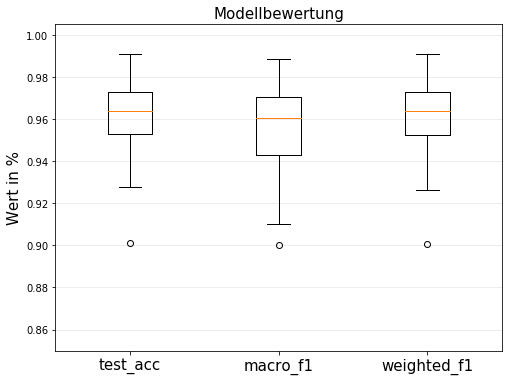

In [20]:
data = [test_acc[:,1], macro_f1, weighted_f1]
data_name = ["test_acc", "macro_f1", "weighted_f1"]

fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot(data)

ax.set_axisbelow(True)
ax.set_title('Modellbewertung', fontsize=15)
ax.set_ylabel('Wert in %', fontsize=15)
ax.set_ylim(0.85, 1.005)

ax.set_xticklabels(data_name, fontsize=15)

ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
plt.show()


In [21]:
model.save("Model_CNN_7Klassen_Datensatz2")